<h1 align="center">Volume 1: Visualizing Complex-valued Functions.</h1>


In [1]:
from matplotlib import pyplot as plt
import numpy as np
import matplotlib

In [2]:
plt.rcParams["figure.dpi"] = 300     # Raise figure quality.

### Problem 1
- Implement `plot_complex()`.
- Plot $f(z) = z$ on $\{x + yi \mid x,y \in [-1,1]\}$.
- Plot $f(z) = \sqrt{z^2 + 1}$ on $\{x + iy \mid x,y \in [-3,3]\}$.

In [3]:
# Problem 1
def plot_complex(f, window=[-1, 1, -1, 1], res=400, title="", abs=False):
    """Visualize the complex-valued function f:C->C on the (res x res) domain
    {a + bi | a in [r_min, r_max], b in [i_min, i_max]} by plotting the
    argument of f(z) and the magnitude of f(z) in separate subplots.
    
    Parameters:
        f (func): A function that accepts and returns arrays with complex entries.
        window ([r_min, r_max, i_min, i_max]): The real and imaginary domain bounds.
        res (int): The plot resolution. The domain should be res x res.
        title (str): A label for the function to set as the figure title.
            Use r"$<latex code>$" for pretty printing. For example, for the function
            f = lambda z: z**2 - np.sqrt(z), use title=r"$f(z) = z^2 - \sqrt{z}$".
    """
    x = np.linspace(window[0], window[1], res) # Real domain.
    y = np.linspace(window[2], window[3], res) # Imaginary domain.
    X, Y = np.meshgrid(x, y) # Make grid matrices.
    Z = X + 1j*Y

    # check which method to use
    if abs:
        plt.pcolormesh(X, Y, np.abs(f(Z)), cmap="viridis", norm=matplotlib.colors.LogNorm())
    else:
        plt.pcolormesh(X, Y, np.angle(f(Z)), cmap="twilight", vmin=-np.pi, vmax=np.pi)

    plt.axis('off')
    plt.title(title)


In [4]:
def f(x): return x
def g(x): return np.sqrt((x**2)+1)
w1= [-1,1,-1,1]
w2= [-3,3,-3,3]
t1, t12 = "arg(z)", "abs(z)"
t2, t22= "arg(sqrt(z))", "abs(sqrt(z))"

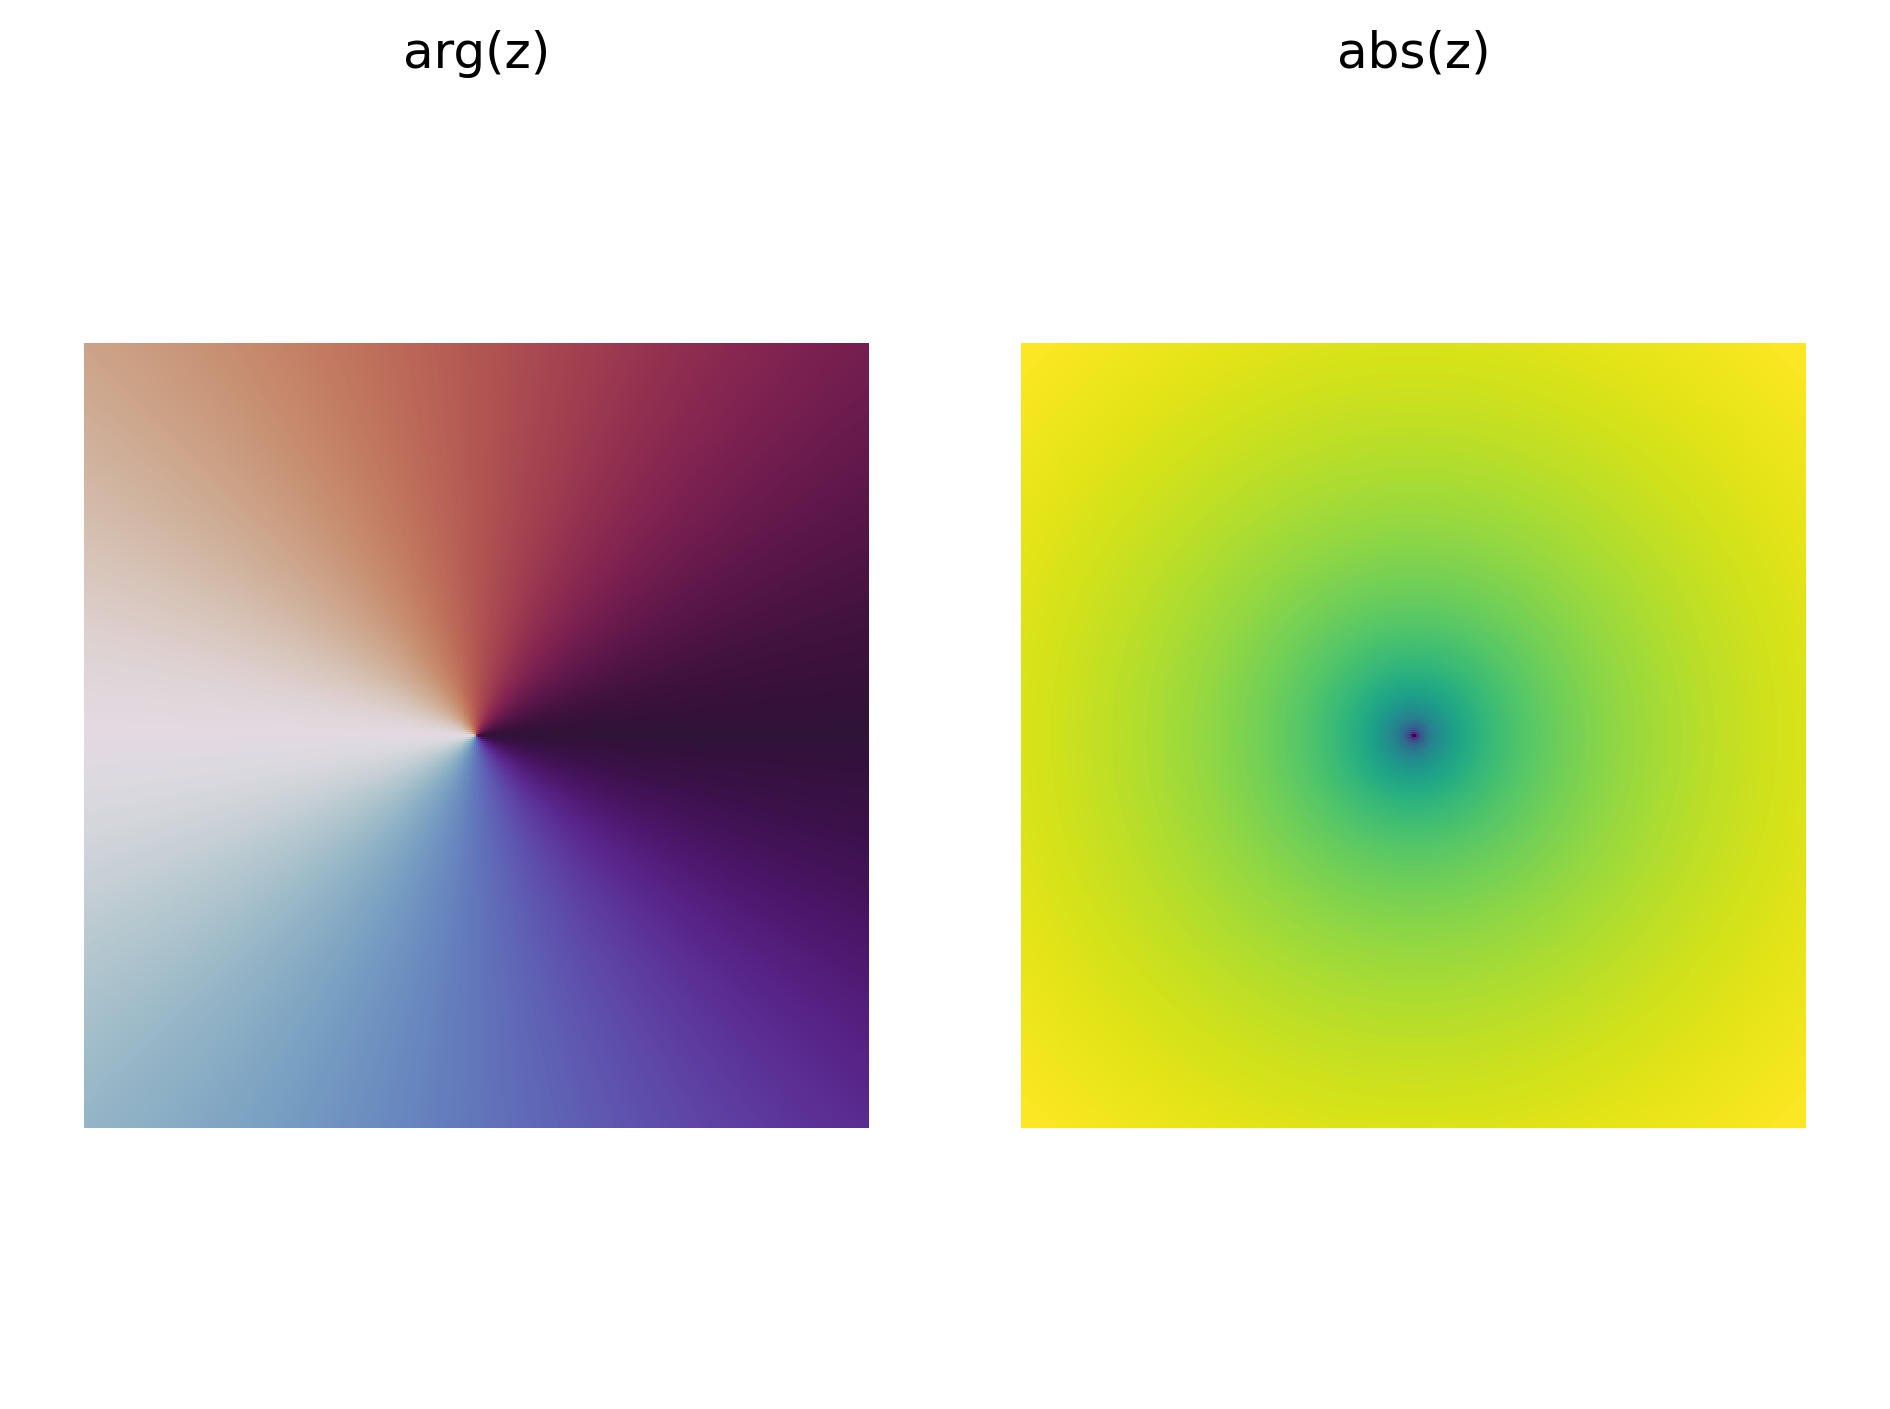

In [5]:
# plot the functions using the two methods
plt.subplot(121)
plot_complex(f,w1,title=t1)
plt.axis("equal")
plt.subplot(122)
plot_complex(f,w1,title=t12,abs=True)
plt.axis("equal")

plt.tight_layout()
plt.show()

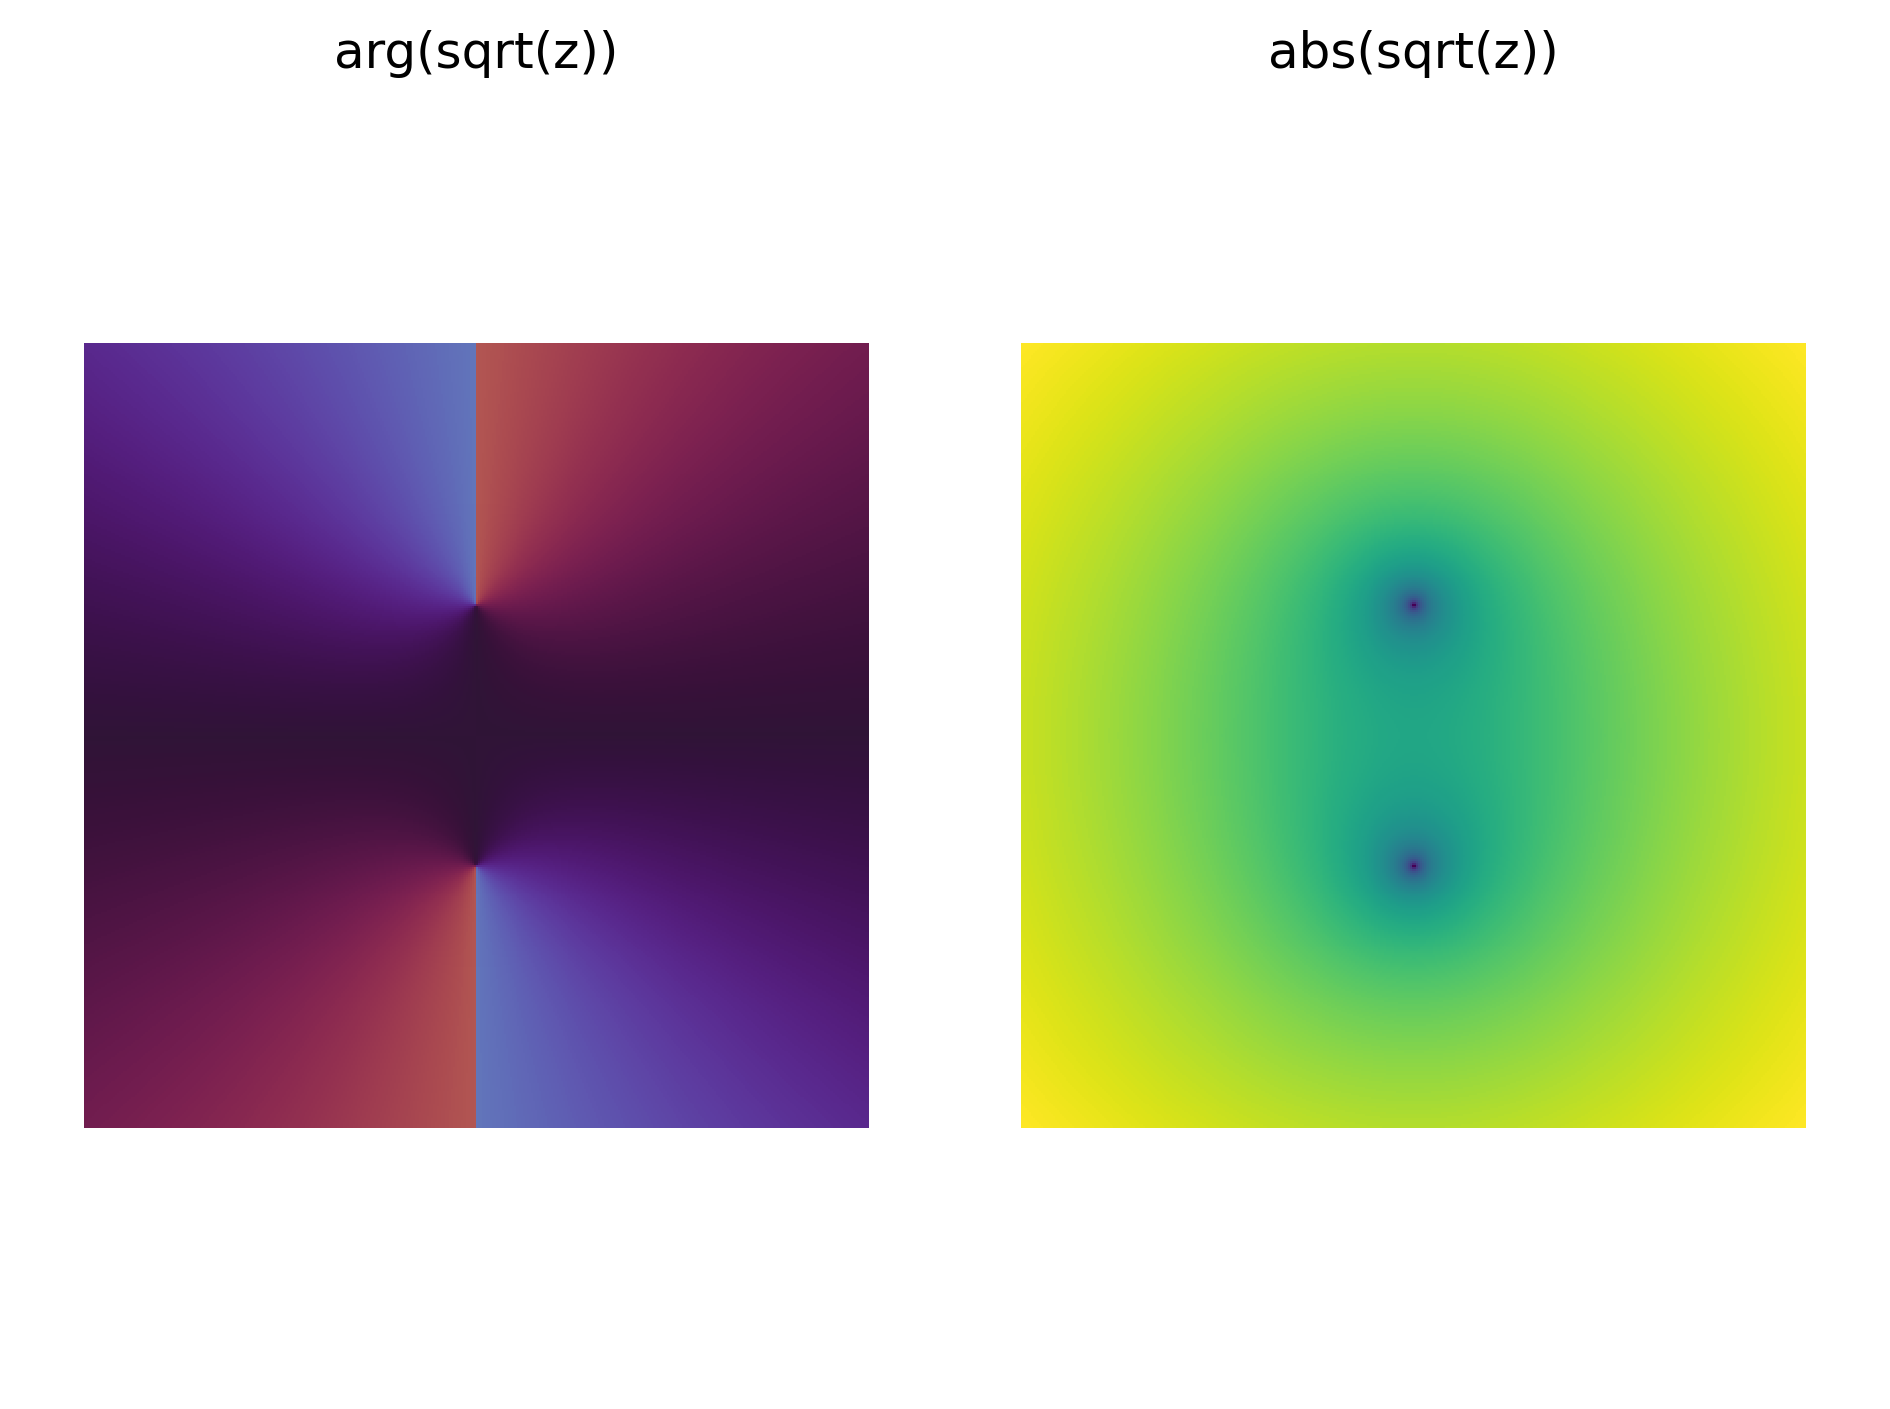

In [6]:
# plot the other function
plt.subplot(121)
plot_complex(g,w2,title=t2)
plt.axis("equal")
plt.subplot(122)
plot_complex(g,w2,title=t22,abs=True)
plt.axis("equal")

plt.tight_layout()
plt.show()

### Problem 2

Plot the following functions on $\{x+iy \mid x \in [-1,1],\; y \in [-1,1]\}$.

- $f(z) = z^n$ for $n=2,3,4$.
- $f(z) = z^3 - iz^4 - 3z^6$.

What does a zero of $f(z)$ look like in these plots?

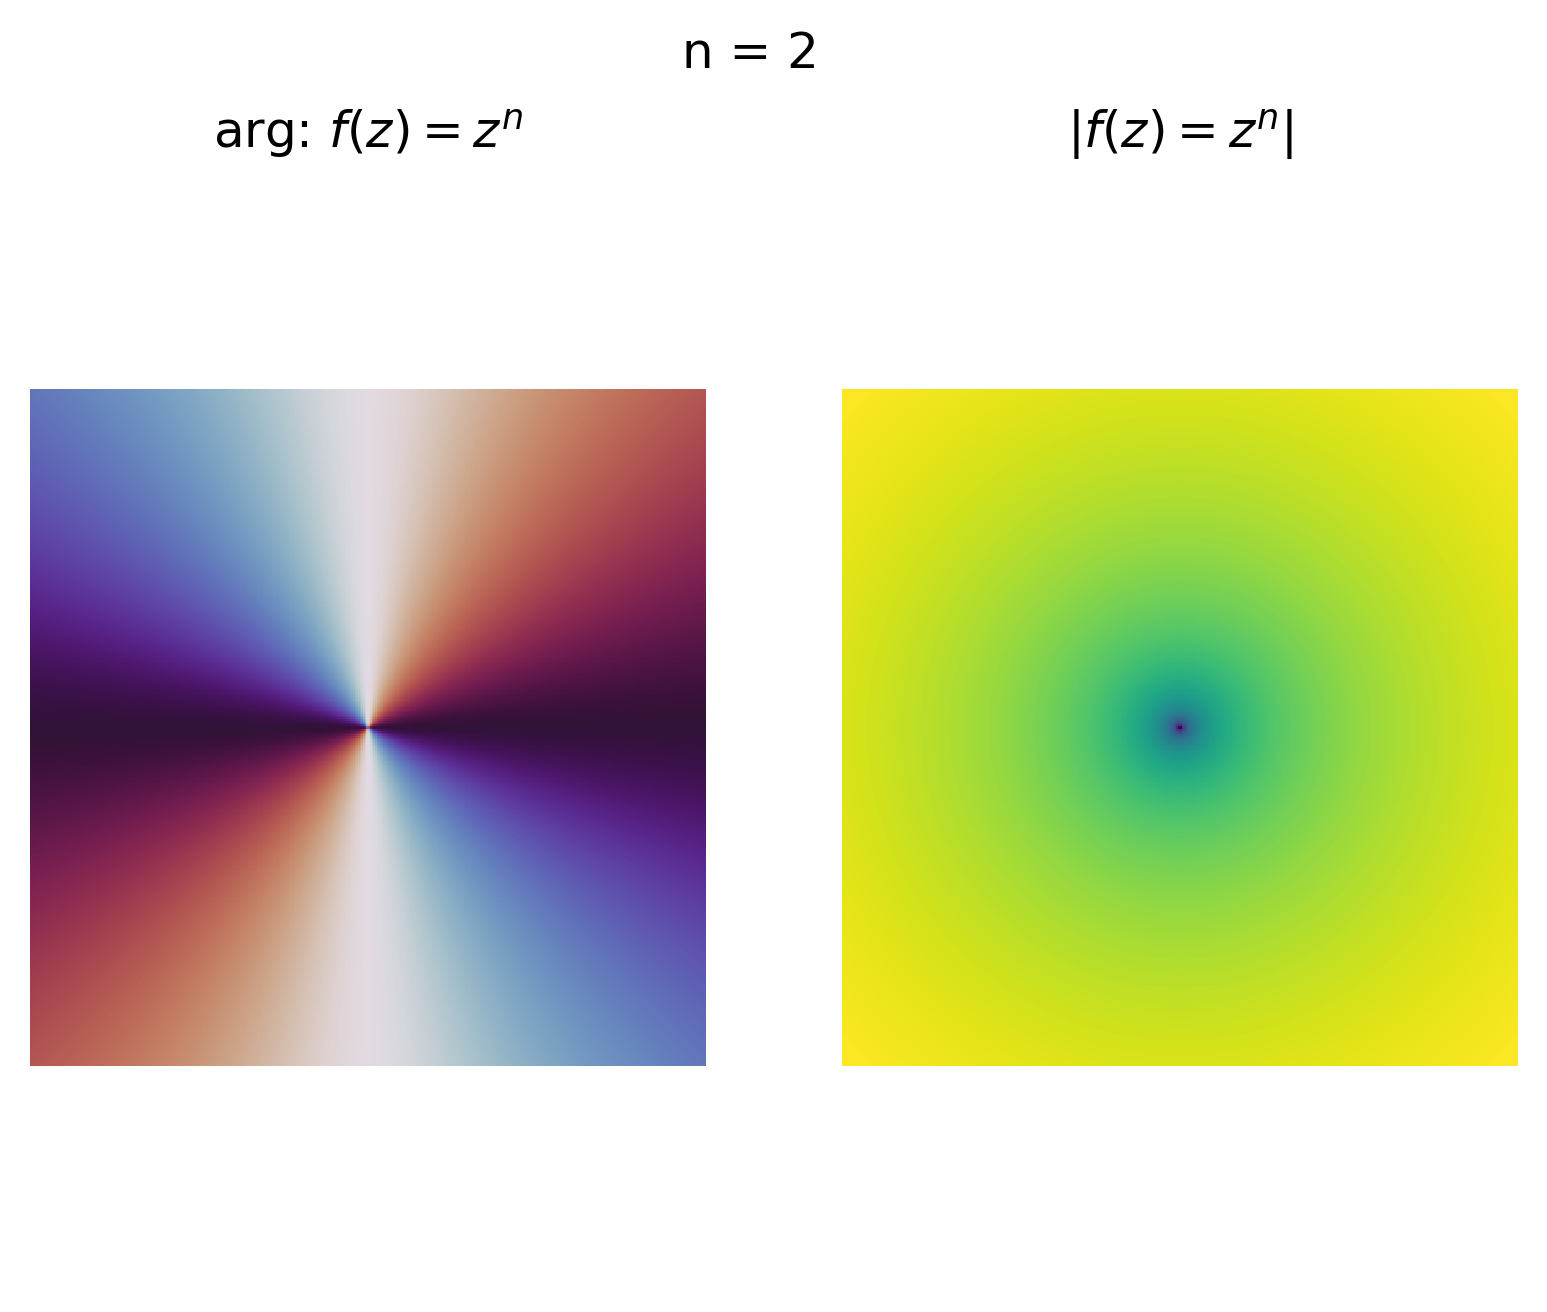

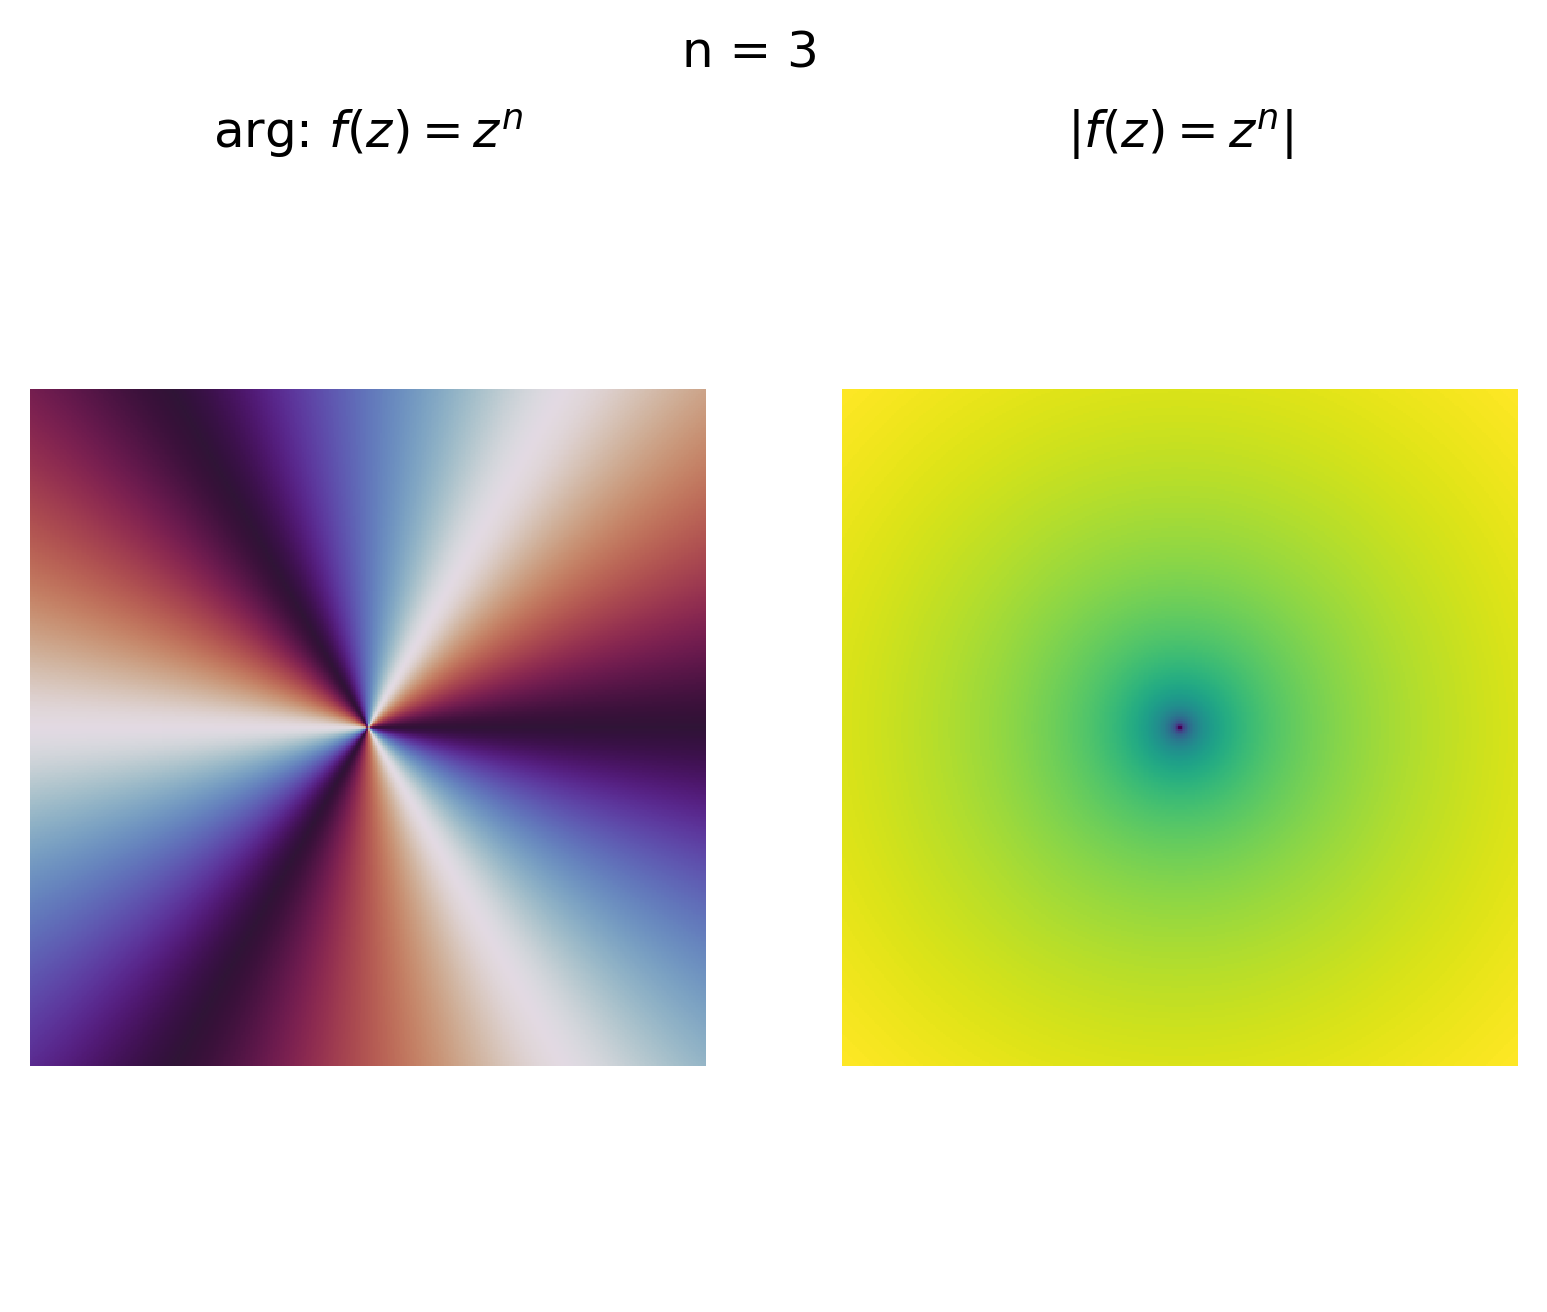

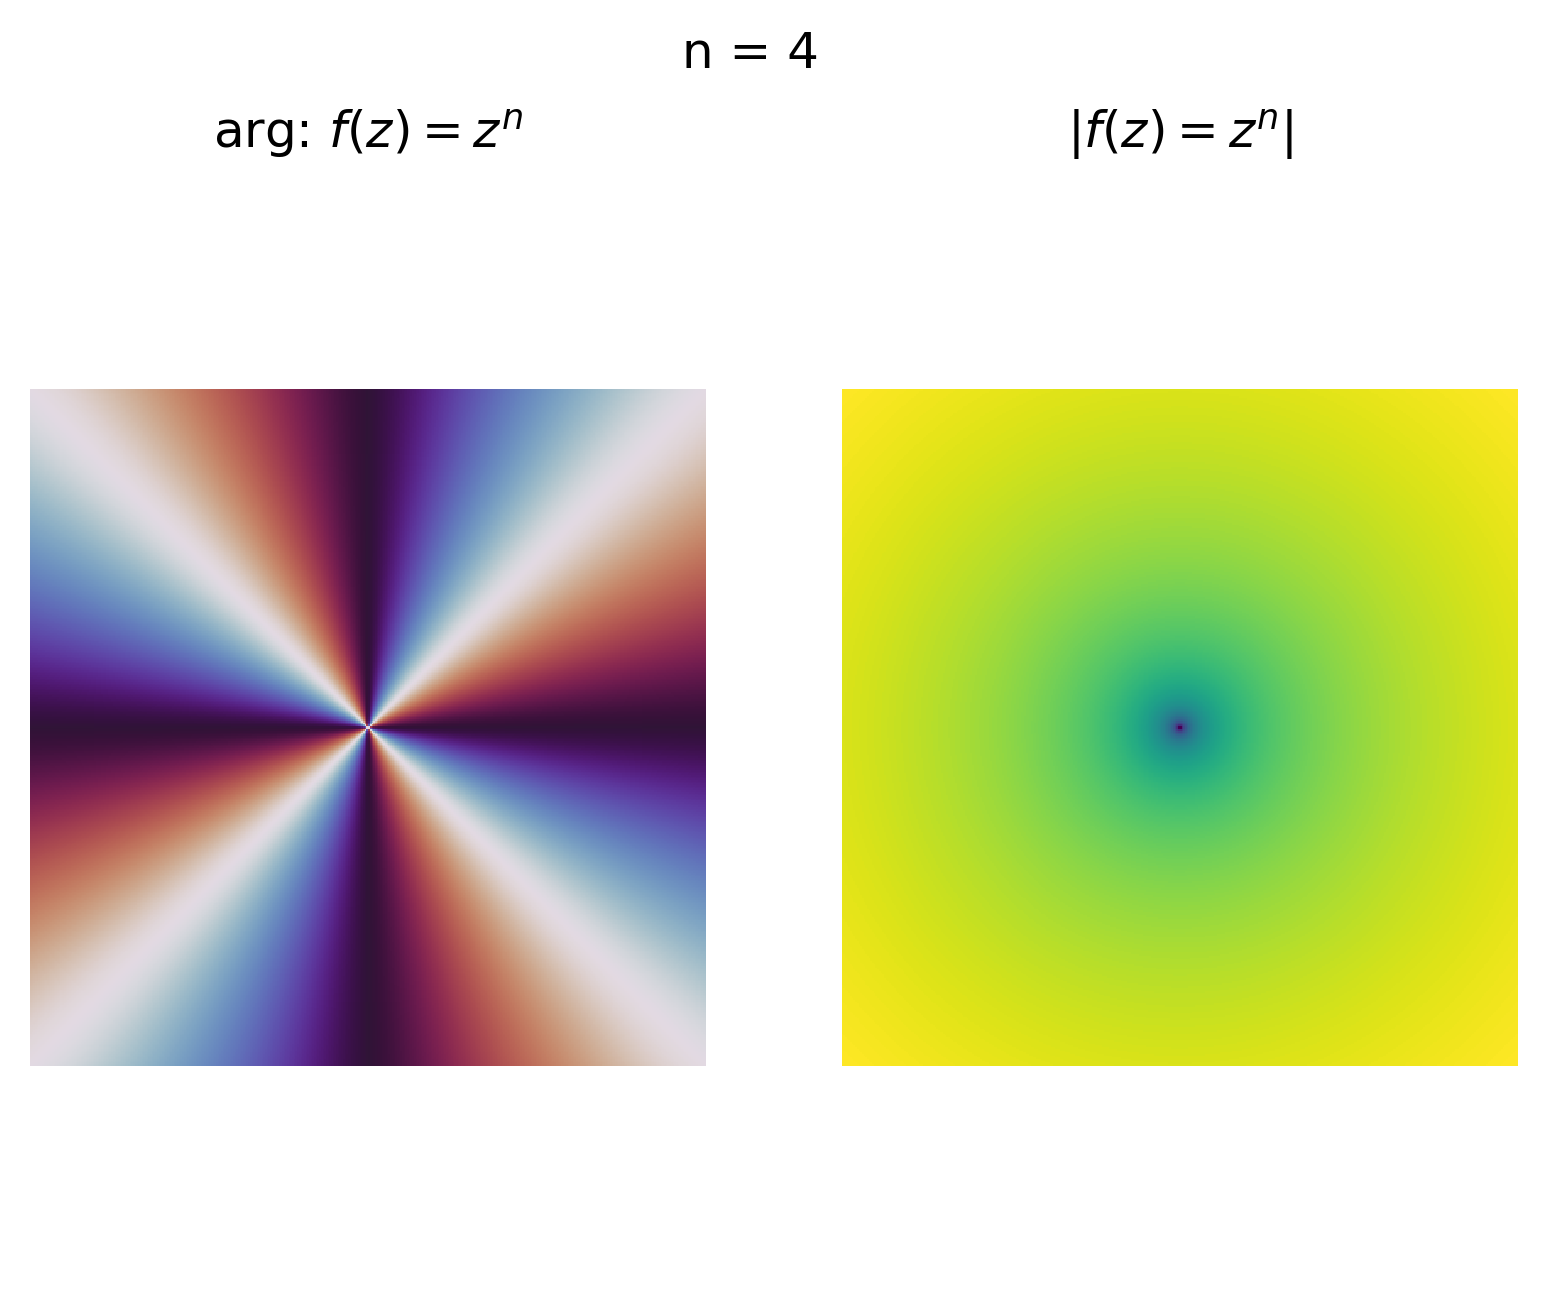

(-1.0025062656641603,
 1.0025062656641603,
 -1.0025062656641603,
 1.0025062656641603)

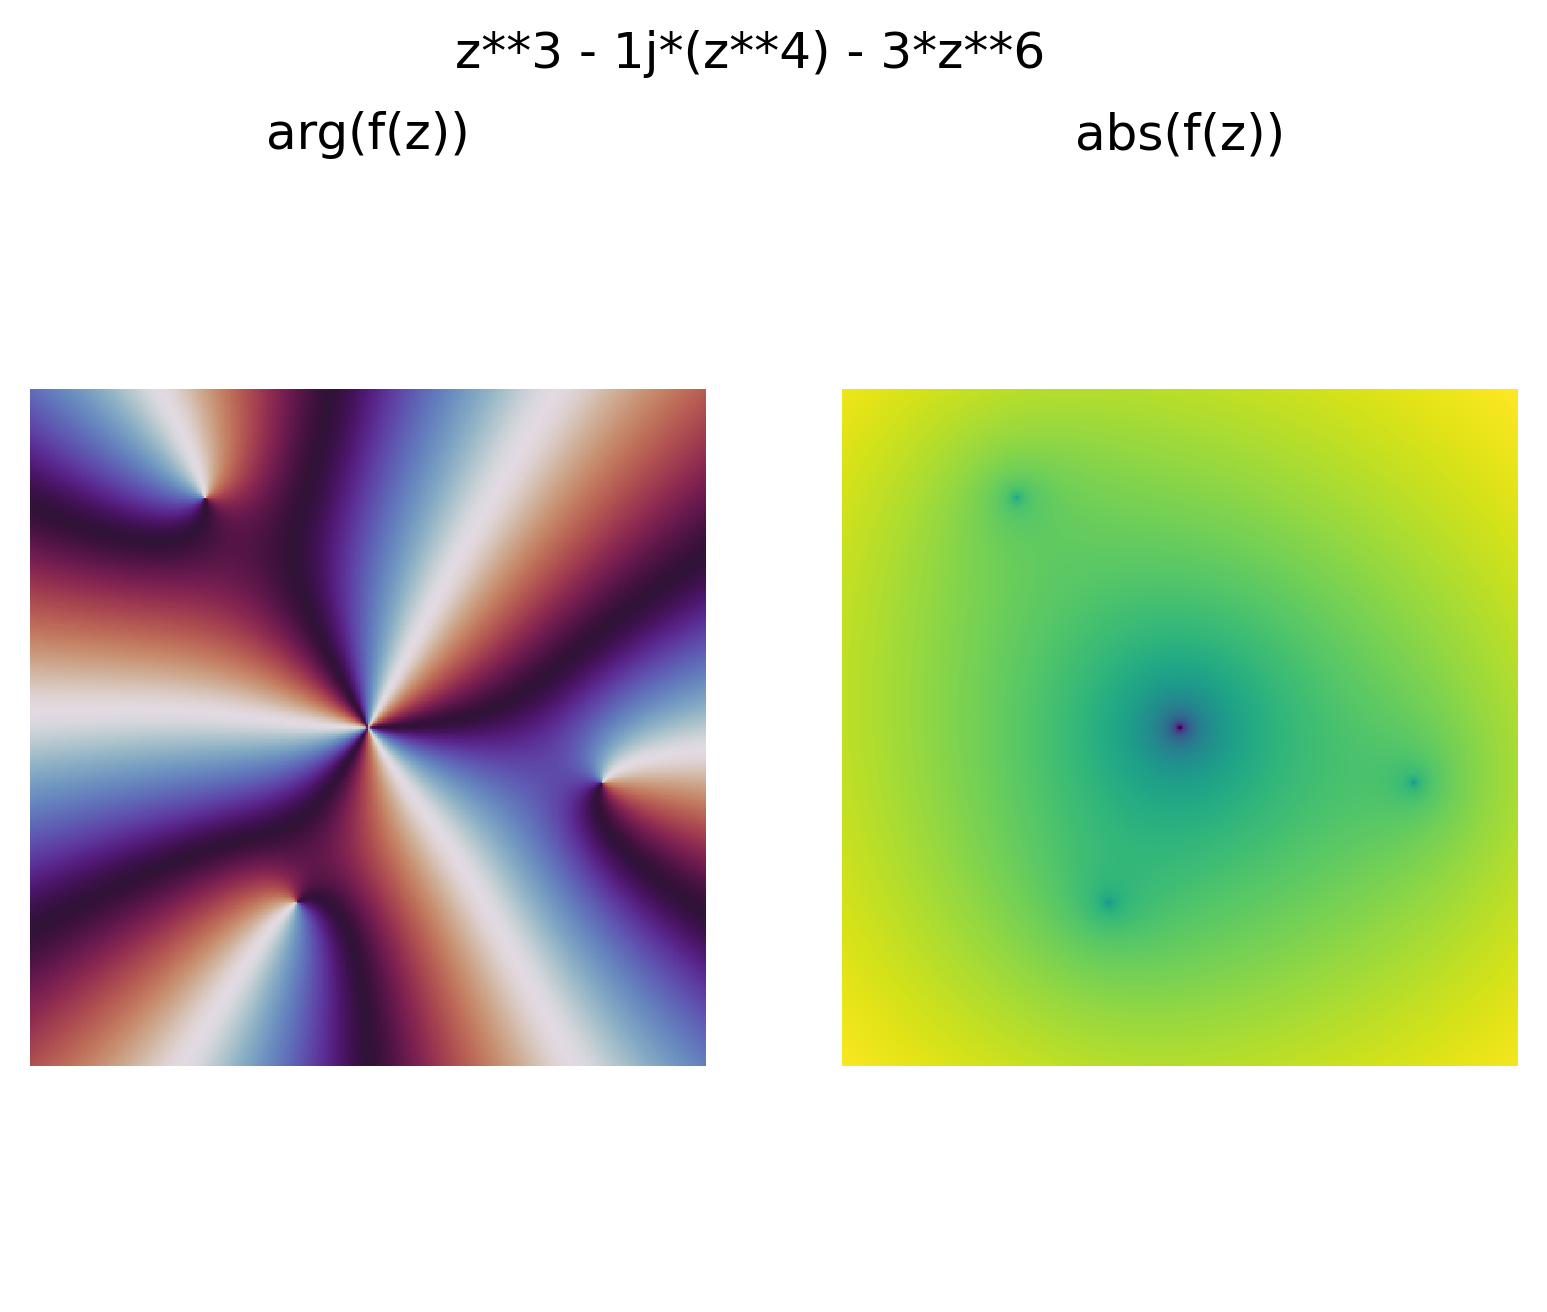

In [7]:
#plot z^n for different n
for n in [2, 3, 4]:
    plt.suptitle(f"n = {n}")
    plt.subplot(121)
    plot_complex(lambda z: z**n, title=r"arg: $f(z) = z^n$")
    plt.axis("equal")

    plt.subplot(122)
    plot_complex(lambda z: z**n, title=r"$|f(z) = z^n$|", abs=True)
    plt.axis("equal")

    plt.tight_layout
    plt.show()

# now plot the second function
plt.suptitle("z**3 - 1j*(z**4) - 3*z**6")
plt.subplot(121)
plot_complex(lambda z: z**3 - 1j*(z**4) - 3*z**6, title="arg(f(z))")
plt.axis("equal")

plt.subplot(122)
plot_complex(lambda z: z**3 - 1j*(z**4) - 3*z**6, title="abs(f(z))", abs=True)
plt.axis("equal")


Answer: In angle plots they appear as the intersection of colors almost like a vertex. In magnitude plots they appear as dots of different color.
The first function has all multiplicity n. The second function has all ones and then multiplicity 3 in the middle.

### Problem 3

Plot the following functions on domains that show all of the zeros and poles.

- $f(z) = z^{-n}$ for $n=1,2,3$.
- $f(z) = z^2 + iz^{-1} + z^{-3}$.

What does a pole of $f(z)$ look like in these plots?

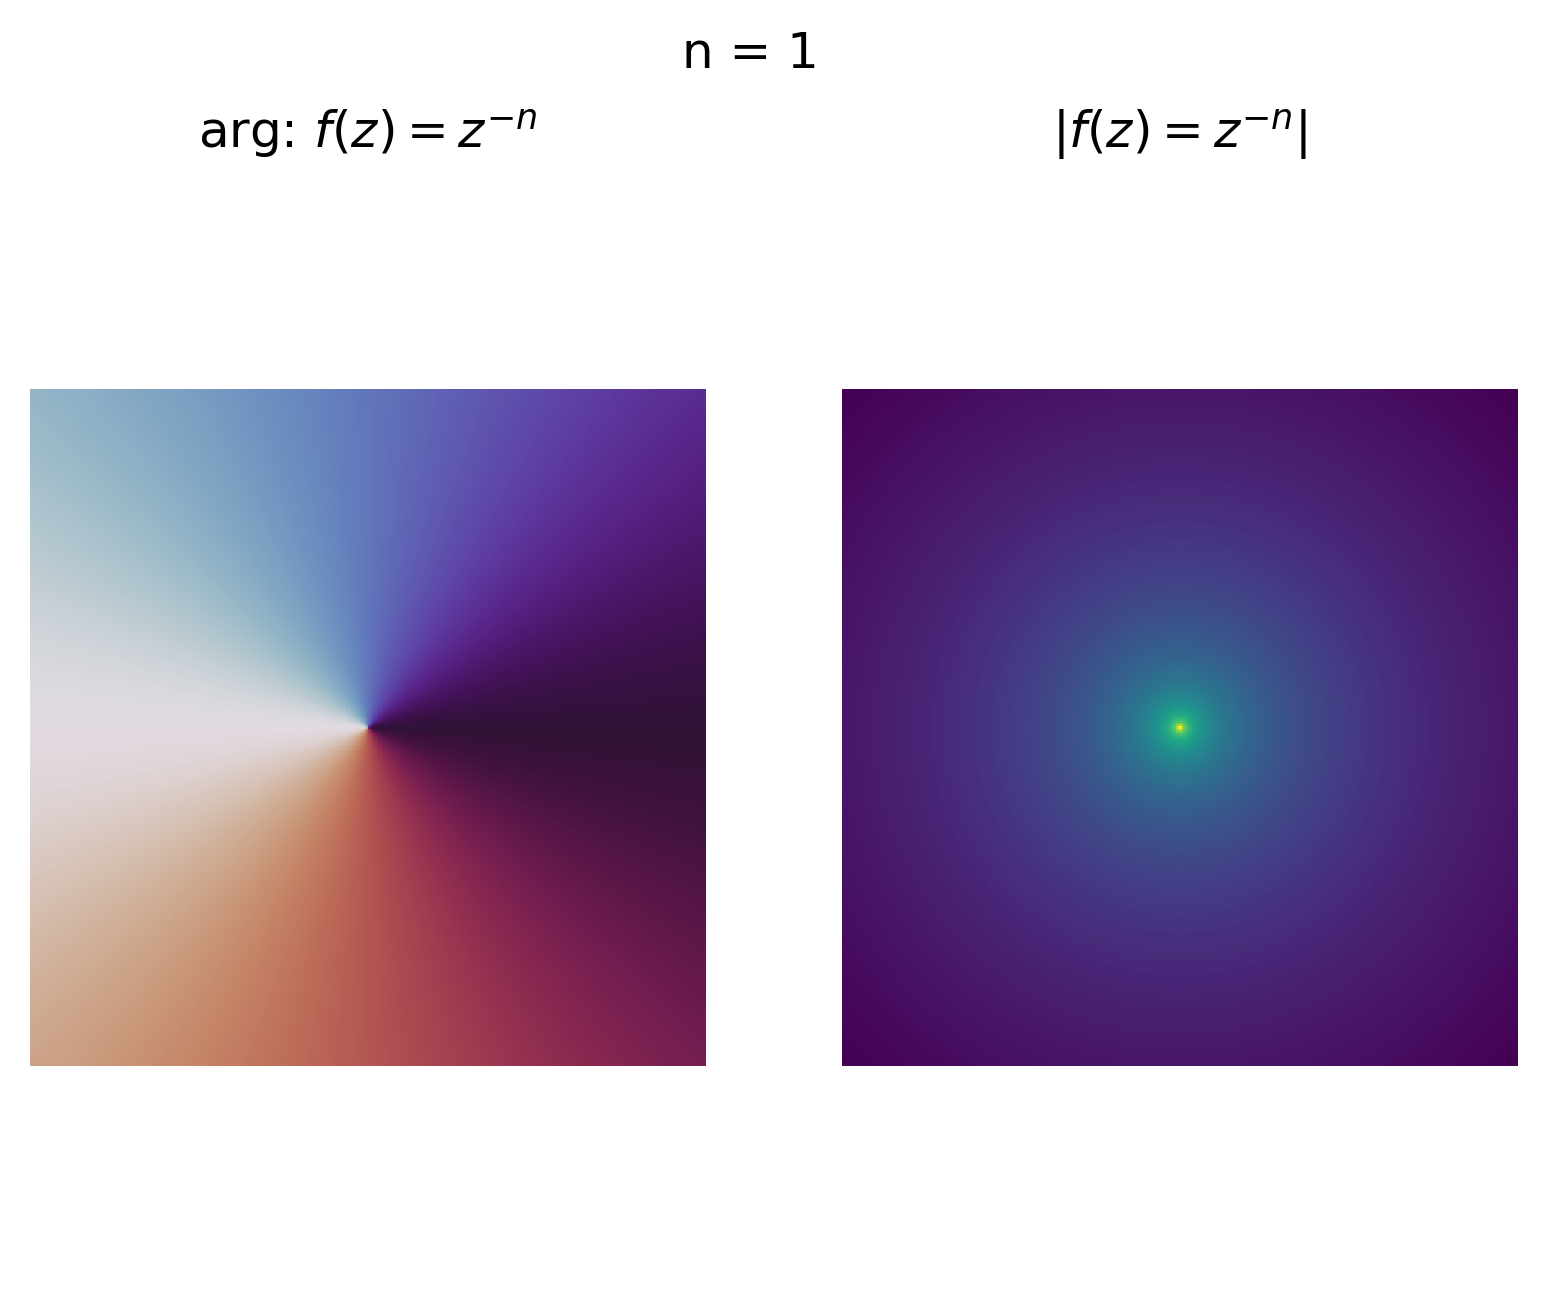

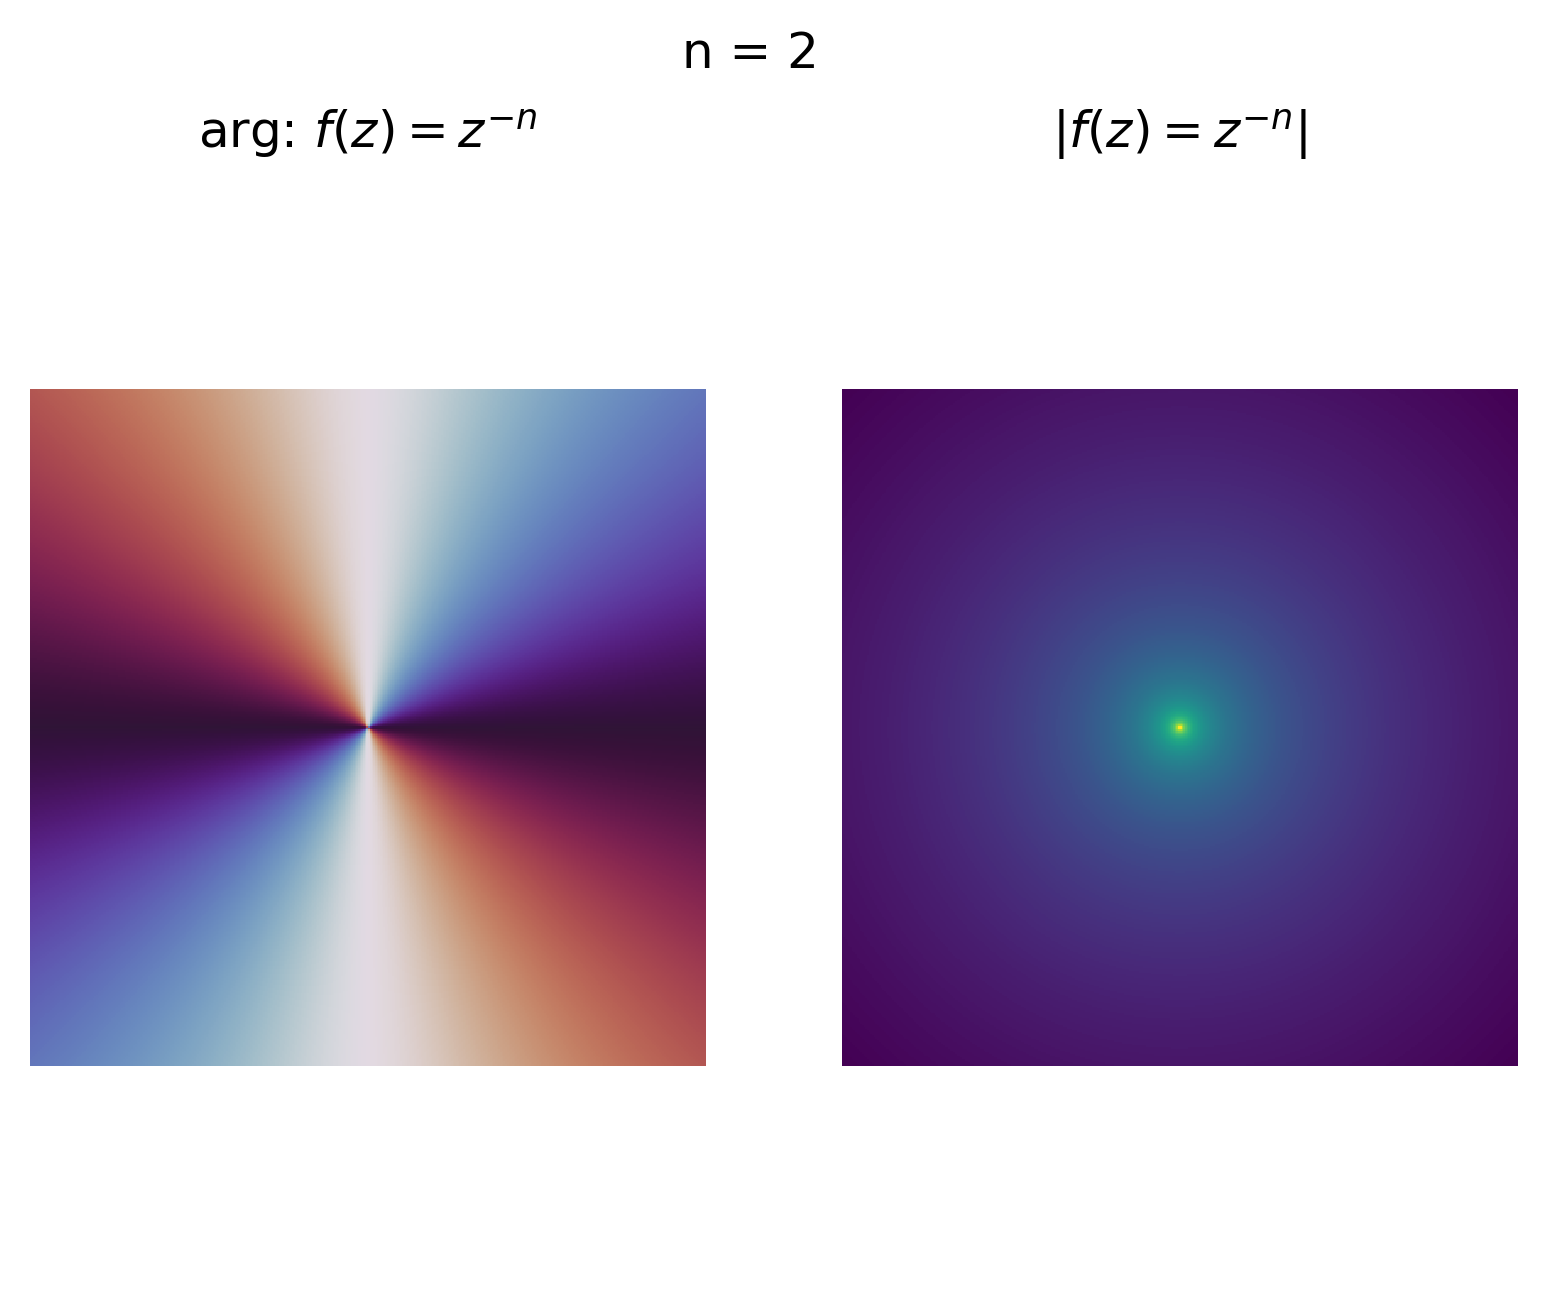

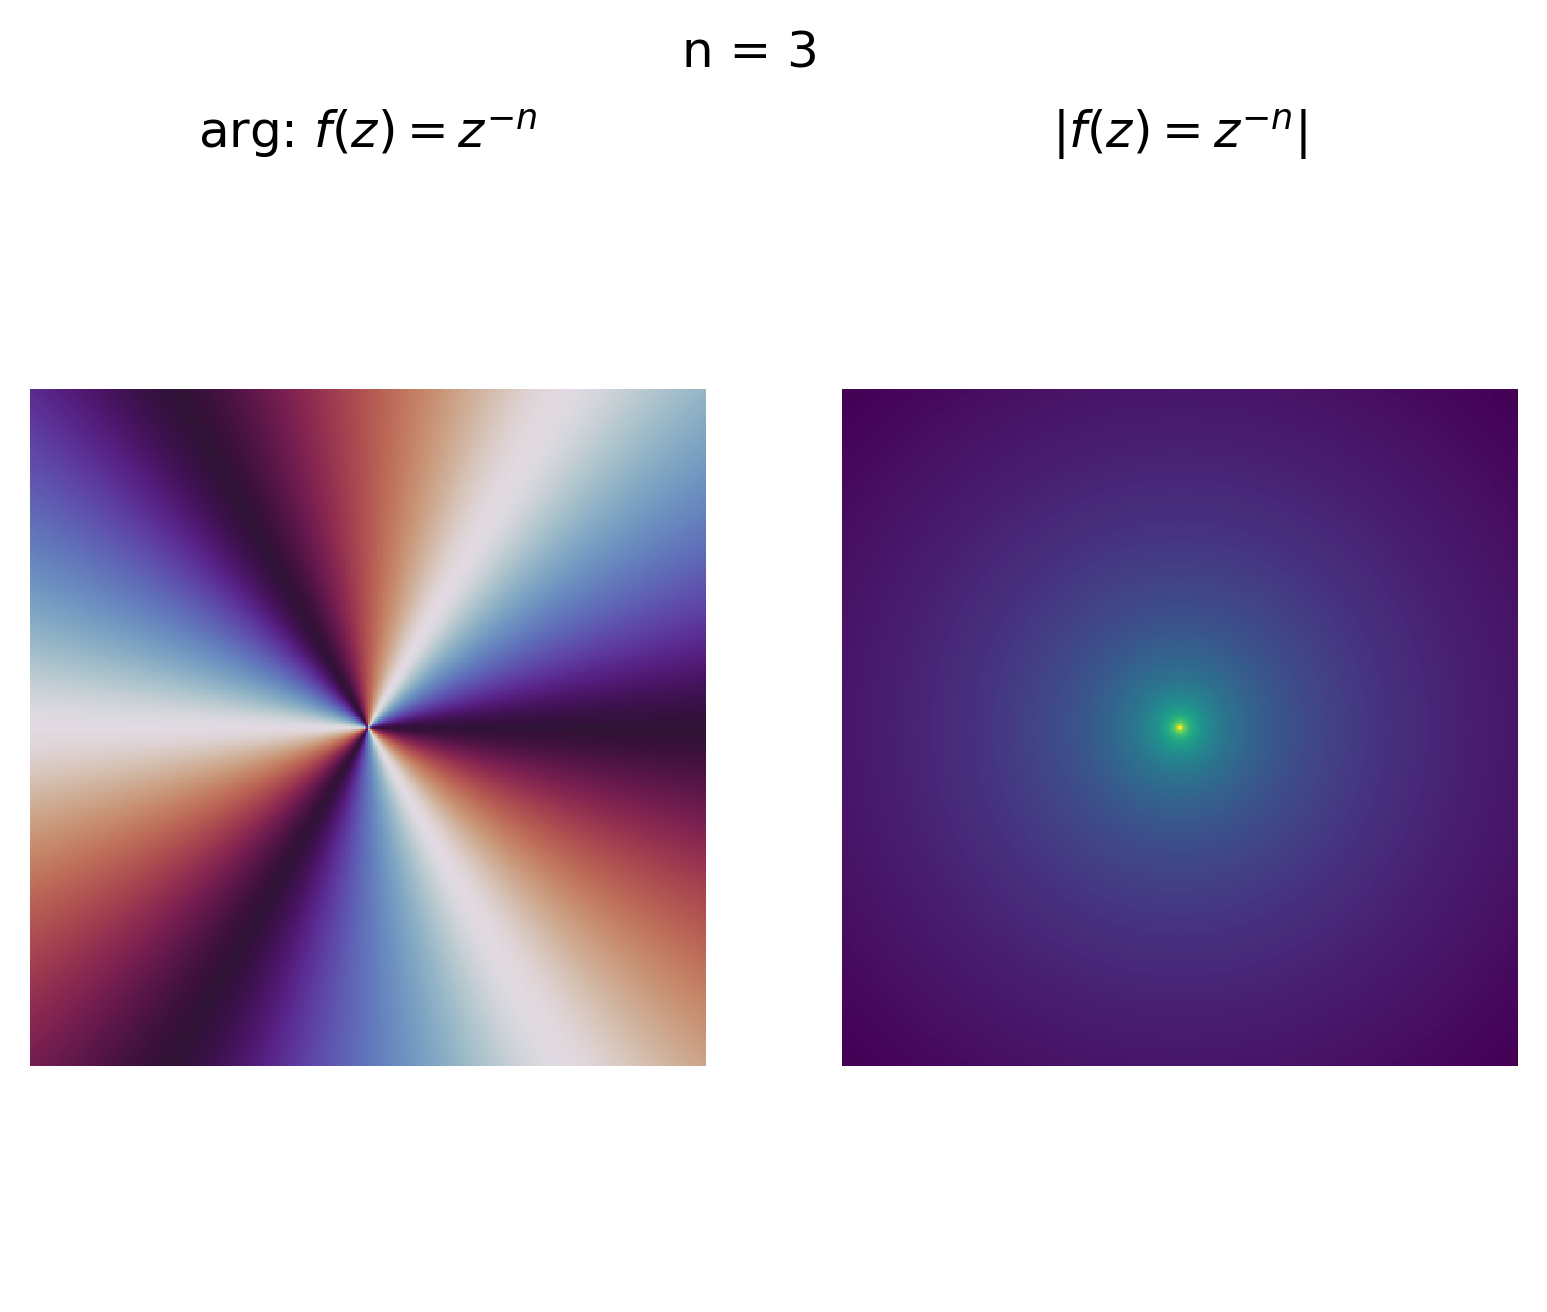

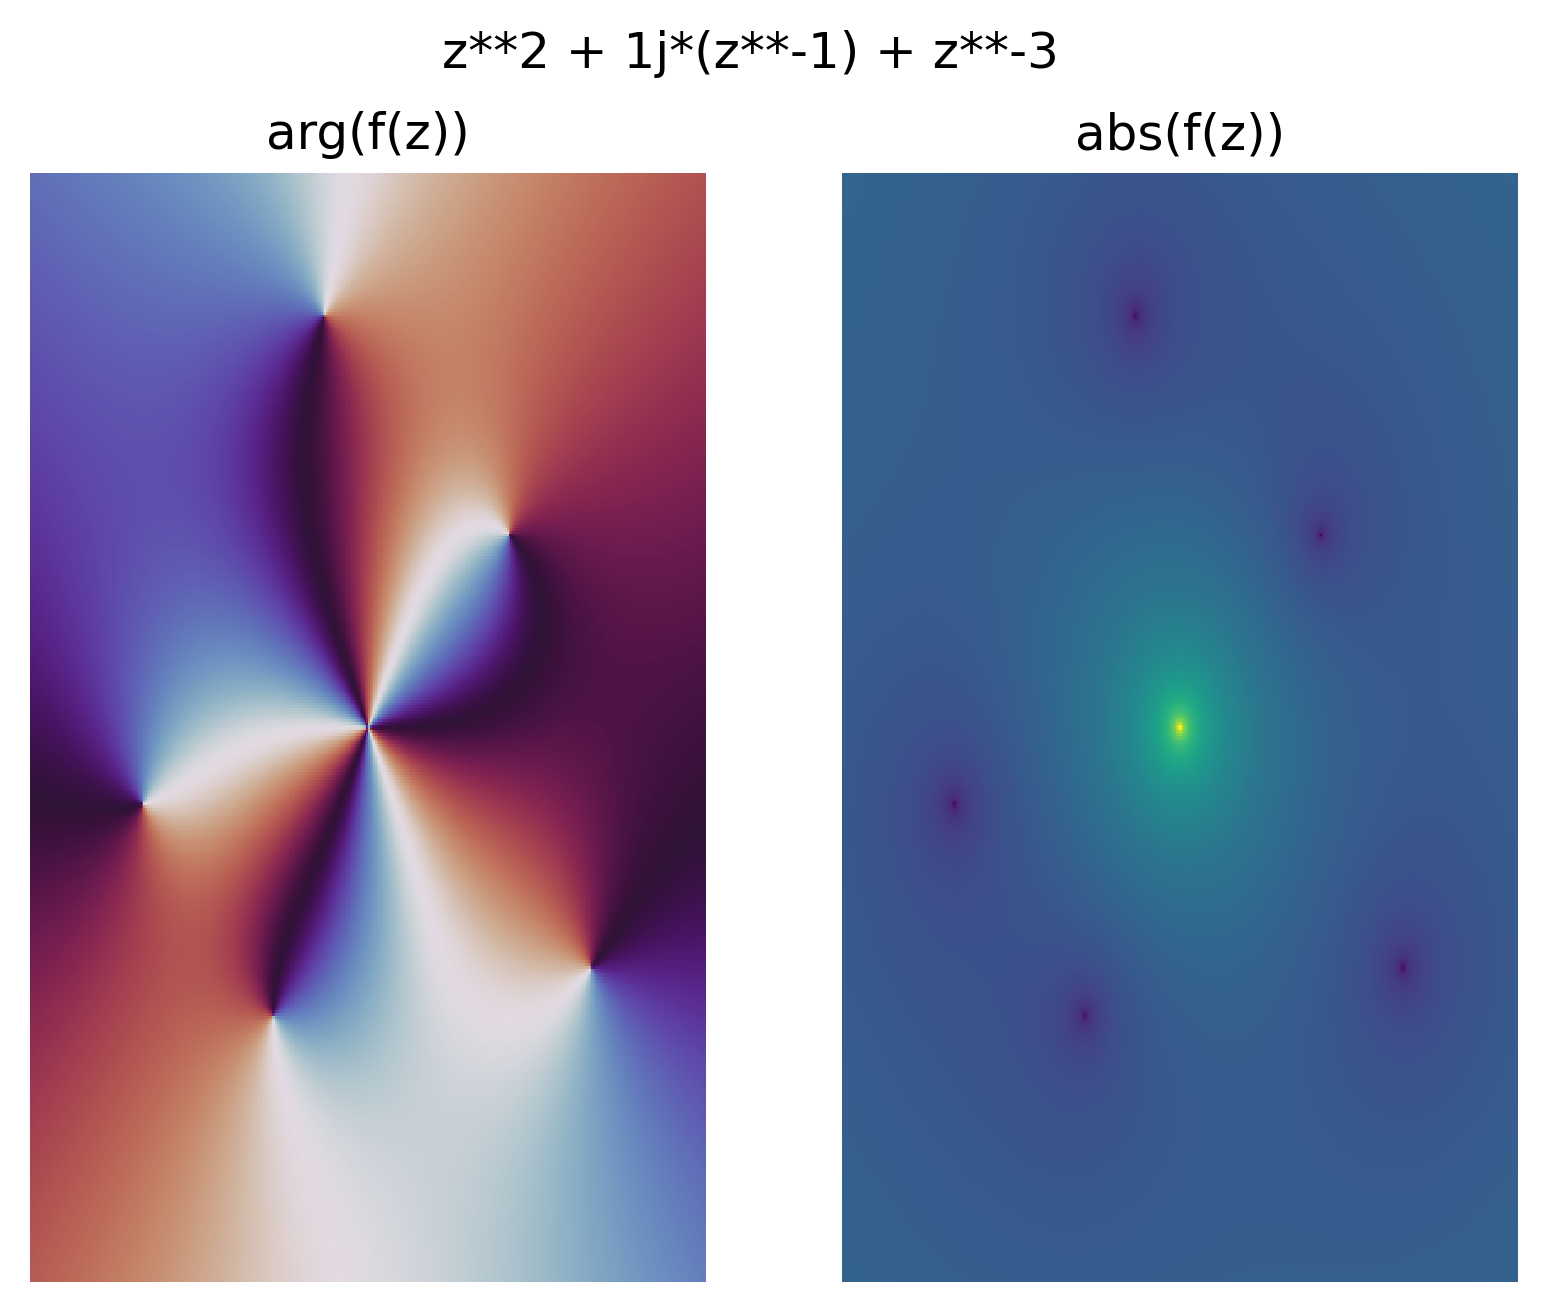

In [8]:
windo = [-1.5,1.5,-1.5,1.5]
#plot z^-n for different n
for n in [1, 2, 3]:
    plt.suptitle(f"n = {n}")
    plt.subplot(121)
    plot_complex(lambda z: z**-n, title=r"arg: $f(z) = z^{-n}$",window=windo)
    plt.axis("equal")

    plt.subplot(122)
    plot_complex(lambda z: z**-n, title=r"$|f(z) = z^{-n}$|", abs=True,window=windo)
    plt.axis("equal")

    plt.tight_layout
    plt.show()

# now plot the second function
plt.suptitle("z**2 + 1j*(z**-1) + z**-3")
plt.subplot(121)
plot_complex(lambda z: z**2 + 1j*(z**-1) + z**-3, title="arg(f(z))",window=windo)

plt.subplot(122)
plot_complex(lambda z: z**2 + 1j*(z**-1) + z**-3, title="abs(f(z))", abs=True,window=windo)

Answer: the angle plot has poles which appear to look like peaks. In the magnitude plot tey appear as different colored spots. You can tell the multiplicity of them on the angle plot by seeing how many times the colors cycle at each point, while in the magnitude plot they appear different colors.

### Problem 4

Plot the following functions and estimate the number and order of their zeros and poles.
Adjust the bounds of the plots until you have found all zeros and poles.

- $f(z) = -4z^5 + 2z^4 - 2z^3 - 4z^2 + 4z - 4$
- $f(z) = z^7 +6z^6 −131z^5 −419z^4 +4906z^3 −131z^2 −420z+4900$
- $f(z) = \frac{16z^4 + 32z^3 + 32z^2 + 16z + 4}{16z^4 - 16z^3 + 5z^2}$

In [9]:
def f(z): return -4*z**5 + 2*z**4 - 2*z**3 - 4*z**2 + 4*z - 4
def g(z): return z**7 + 6*z**6 - 131*z**5 - 419*z**4 + 4906*z**3 - 131*z**2 - 420*z + 4900
def h(z): return (16*z**4 + 32*z**3 + 32*z**2 + 16*z + 4) / (16*z**4 - 16*z**3 + 5*z**2)

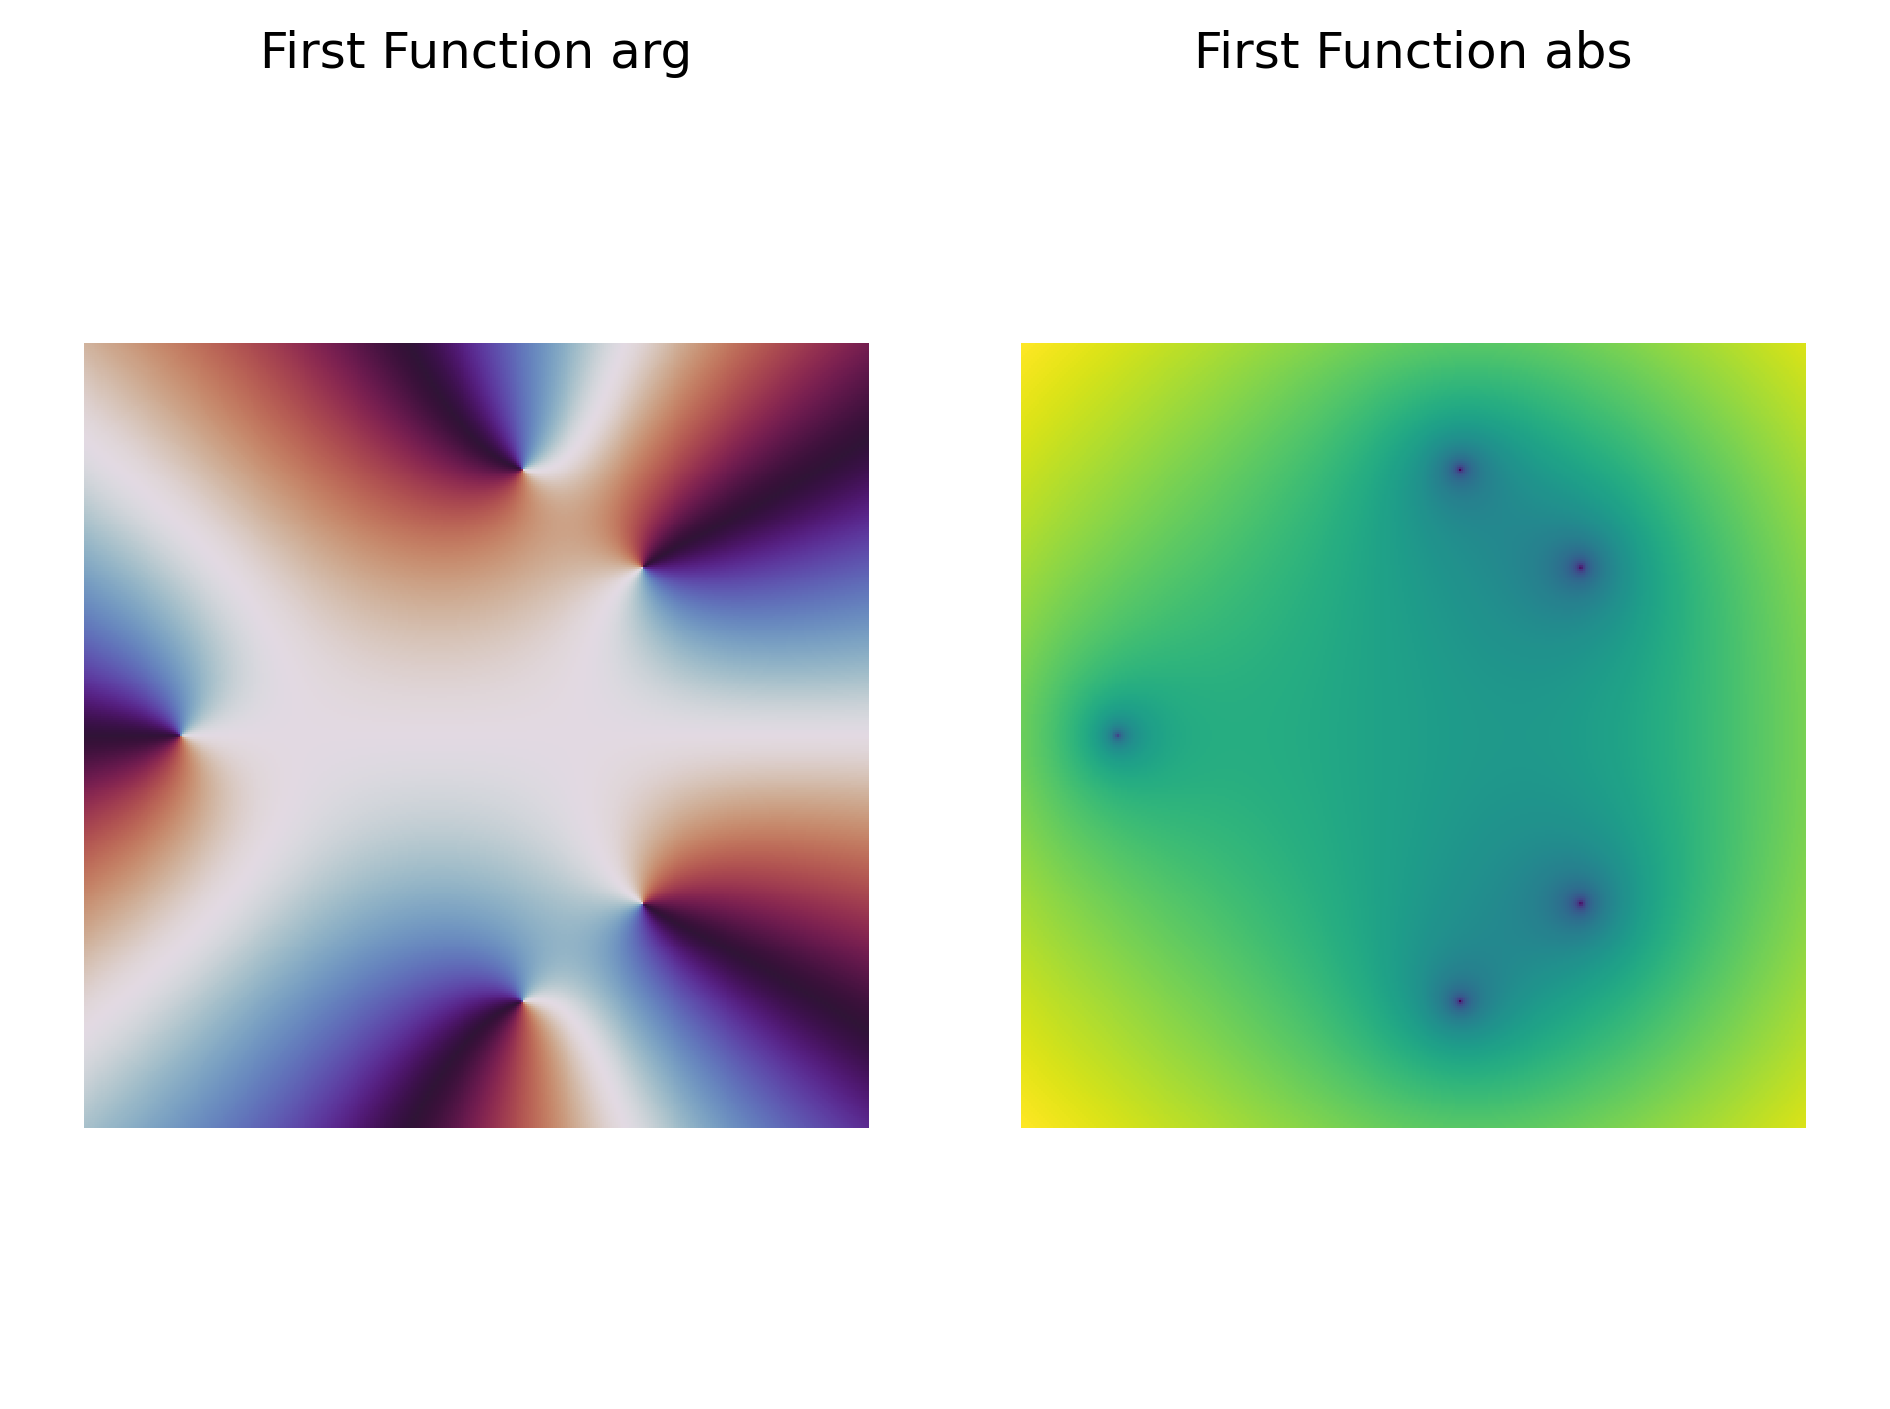

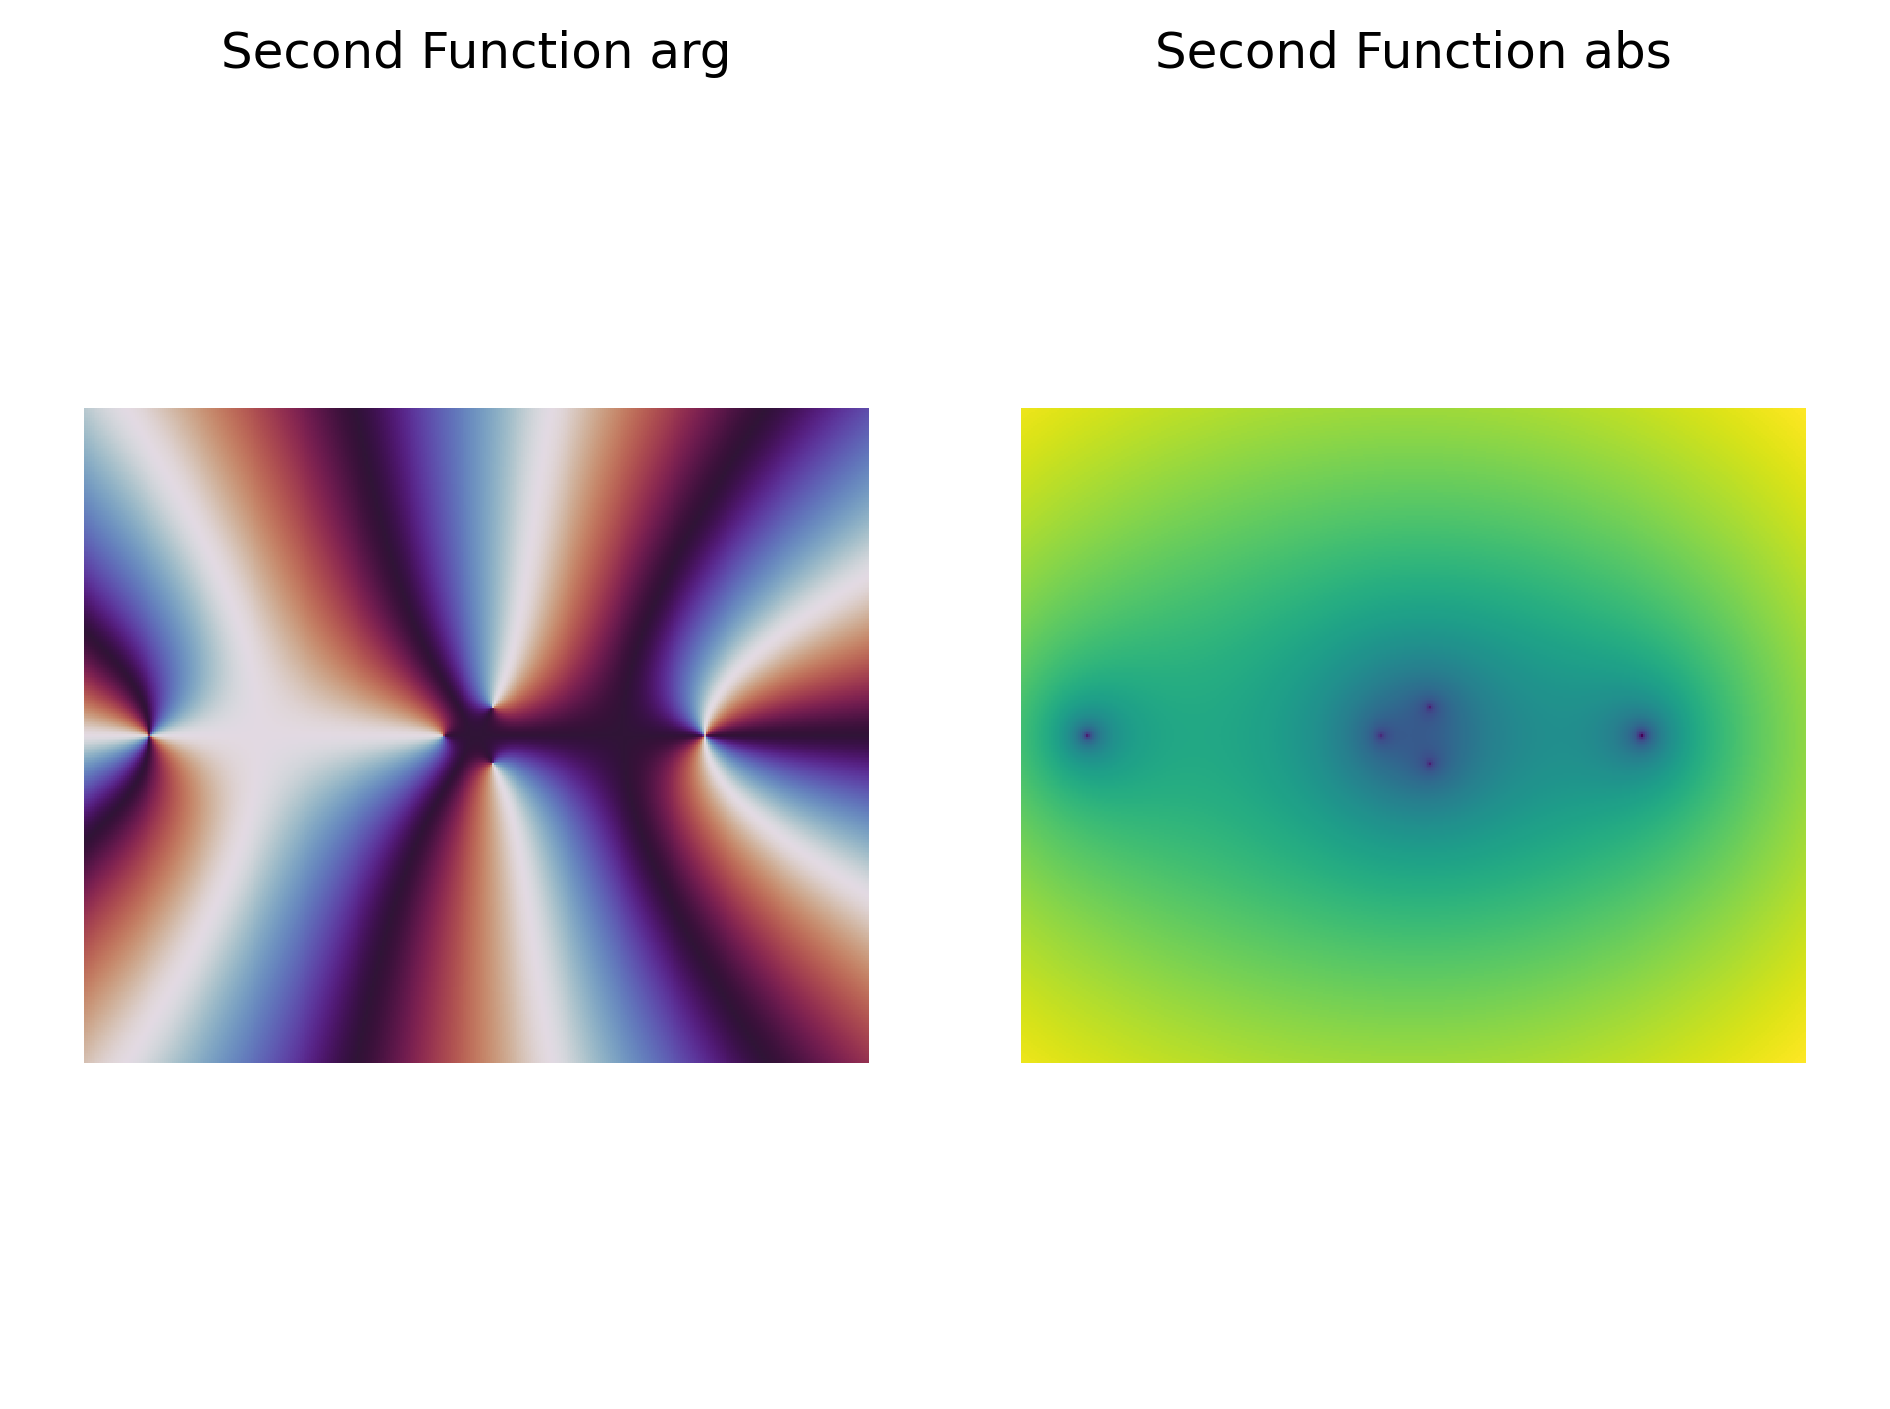

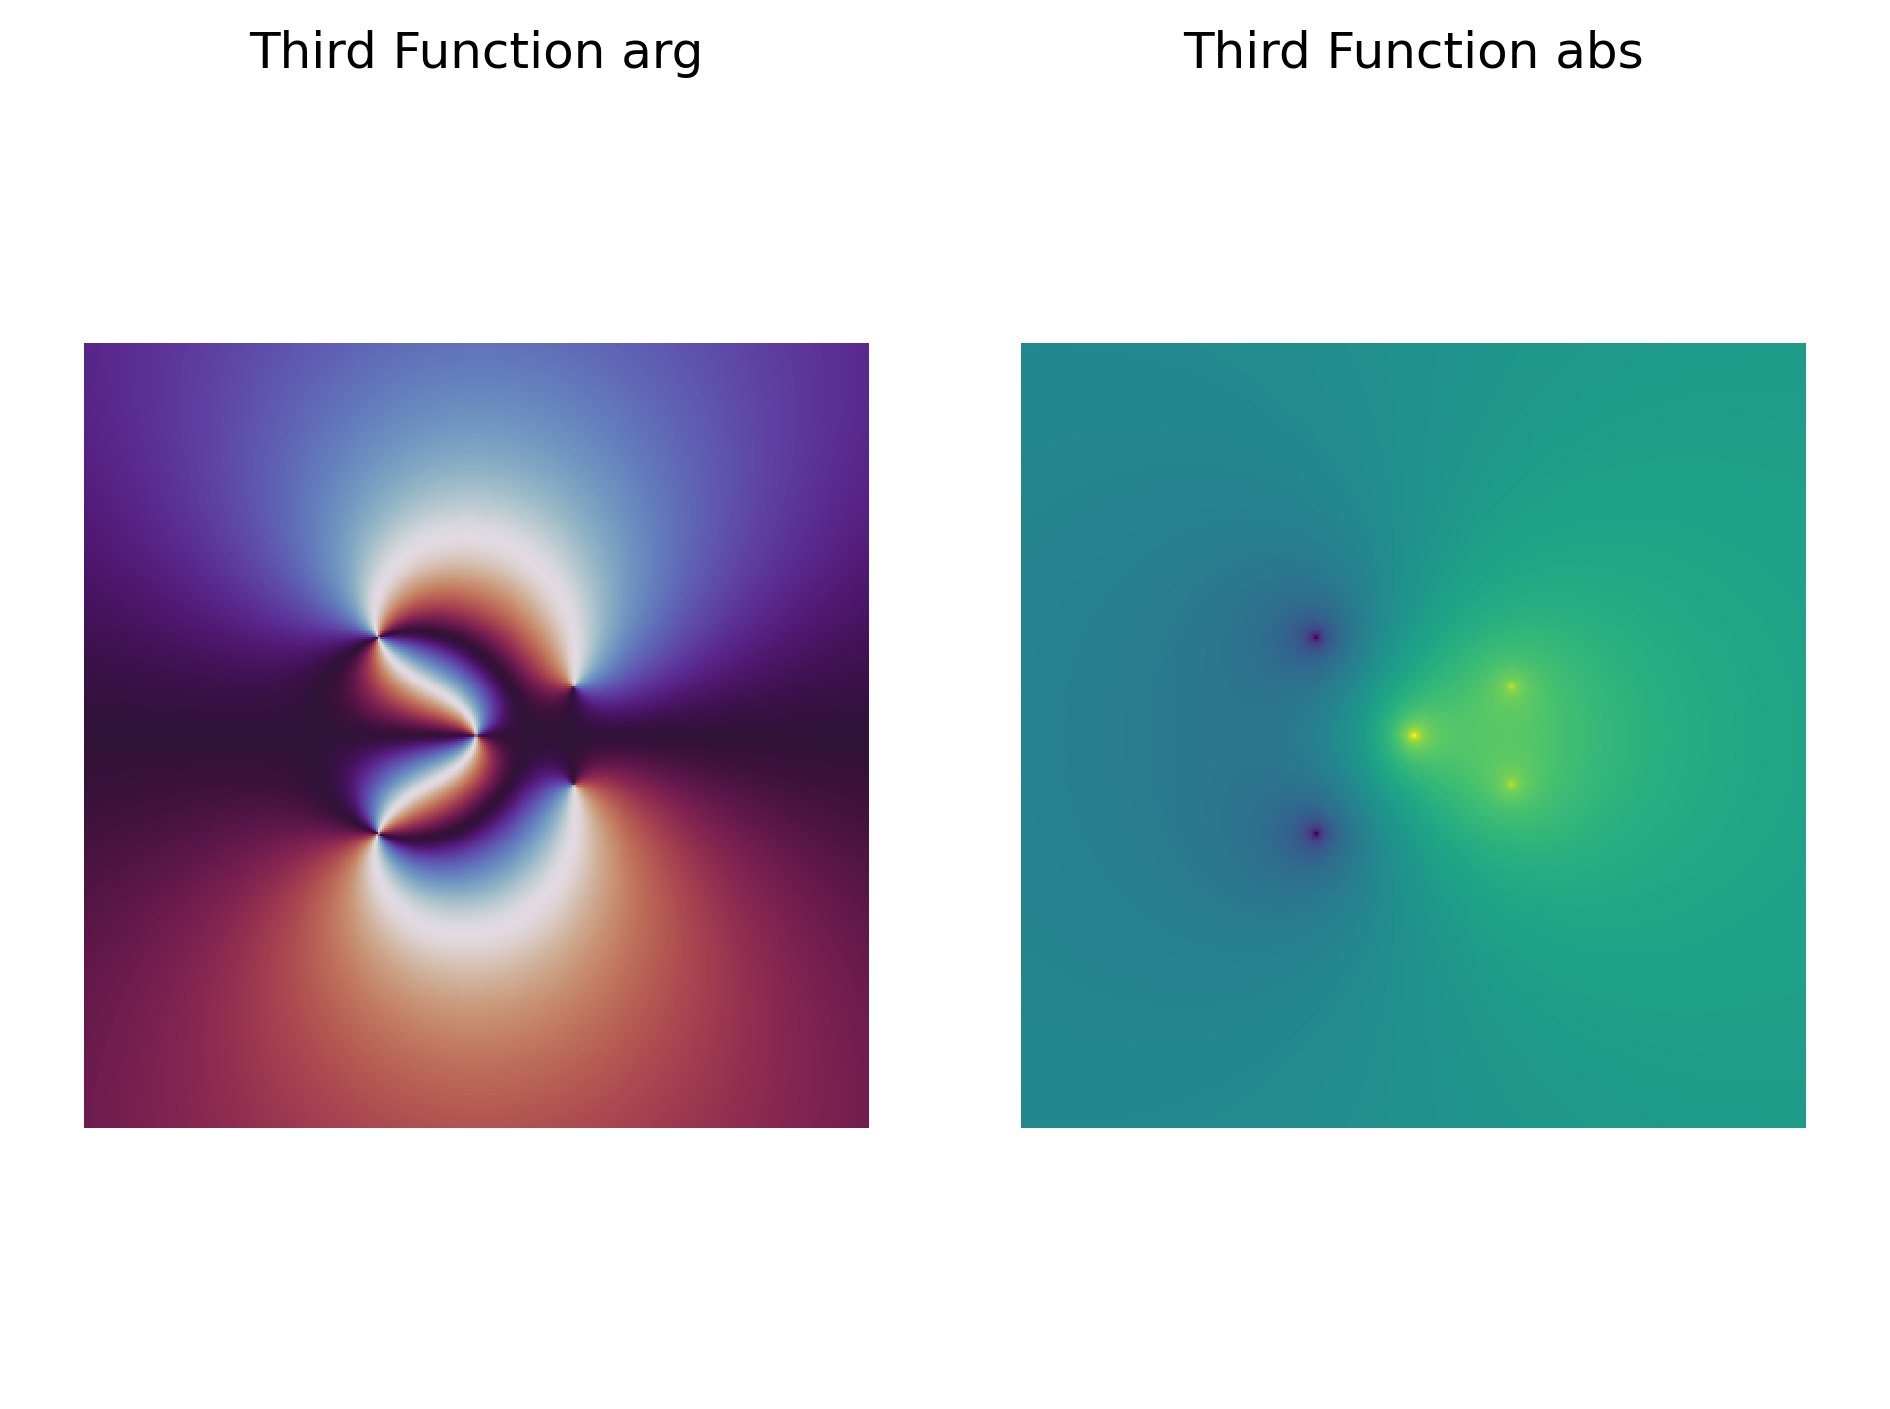

In [10]:
# create windows
windo1 = [-12,12,-10,10]
windo2 = [-2,2,-2,2]

# plot the first function
plt.subplot(121)
plot_complex(f,window=windo,title="First Function arg")
plt.axis('equal')

plt.subplot(122)
plot_complex(f,window=windo,title="First Function abs",abs=True)
plt.axis('equal')

plt.tight_layout()
plt.show()

# now plot the second function
plt.subplot(121)
plot_complex(g,window=windo1,title="Second Function arg")

plt.axis('equal')
plt.subplot(122)
plot_complex(g,window=windo1,title="Second Function abs",abs=True)

plt.axis('equal')
plt.tight_layout()
plt.show()

plt.subplot(121)
plot_complex(h,window=windo2,title="Third Function arg")
plt.axis('equal')

plt.subplot(122)
plot_complex(h,window=windo2,title="Third Function abs",abs=True)
plt.axis('equal')

plt.tight_layout()
plt.show()




Answers: The first one has 5 and all seem to have multiplicity 1. The second has 5 and 3 with multiplicity 1 and 2 with multiplicity 2. The third function has 5 and two have multiplicity 1 while 3 have multiplicity 2.

### Problem 5

Plot the following functions on the domain $\{x+iy\mid x,y\in[-8,8]\}$.
Explain carefully what each graph reveals about the function and why the function behaves that way.

- $f(z) = e^z$.
- $f(z) = \tan(z)$.

(Hint: use the polar coordinate representation to mathematically examine the magnitude and angle of each function.)

In [11]:
def f(z): return np.exp(z)
def g(z): return np.tan(z)
windo1 = [-8,8,-8,8]
windo2 = [-8,8,-8,8]

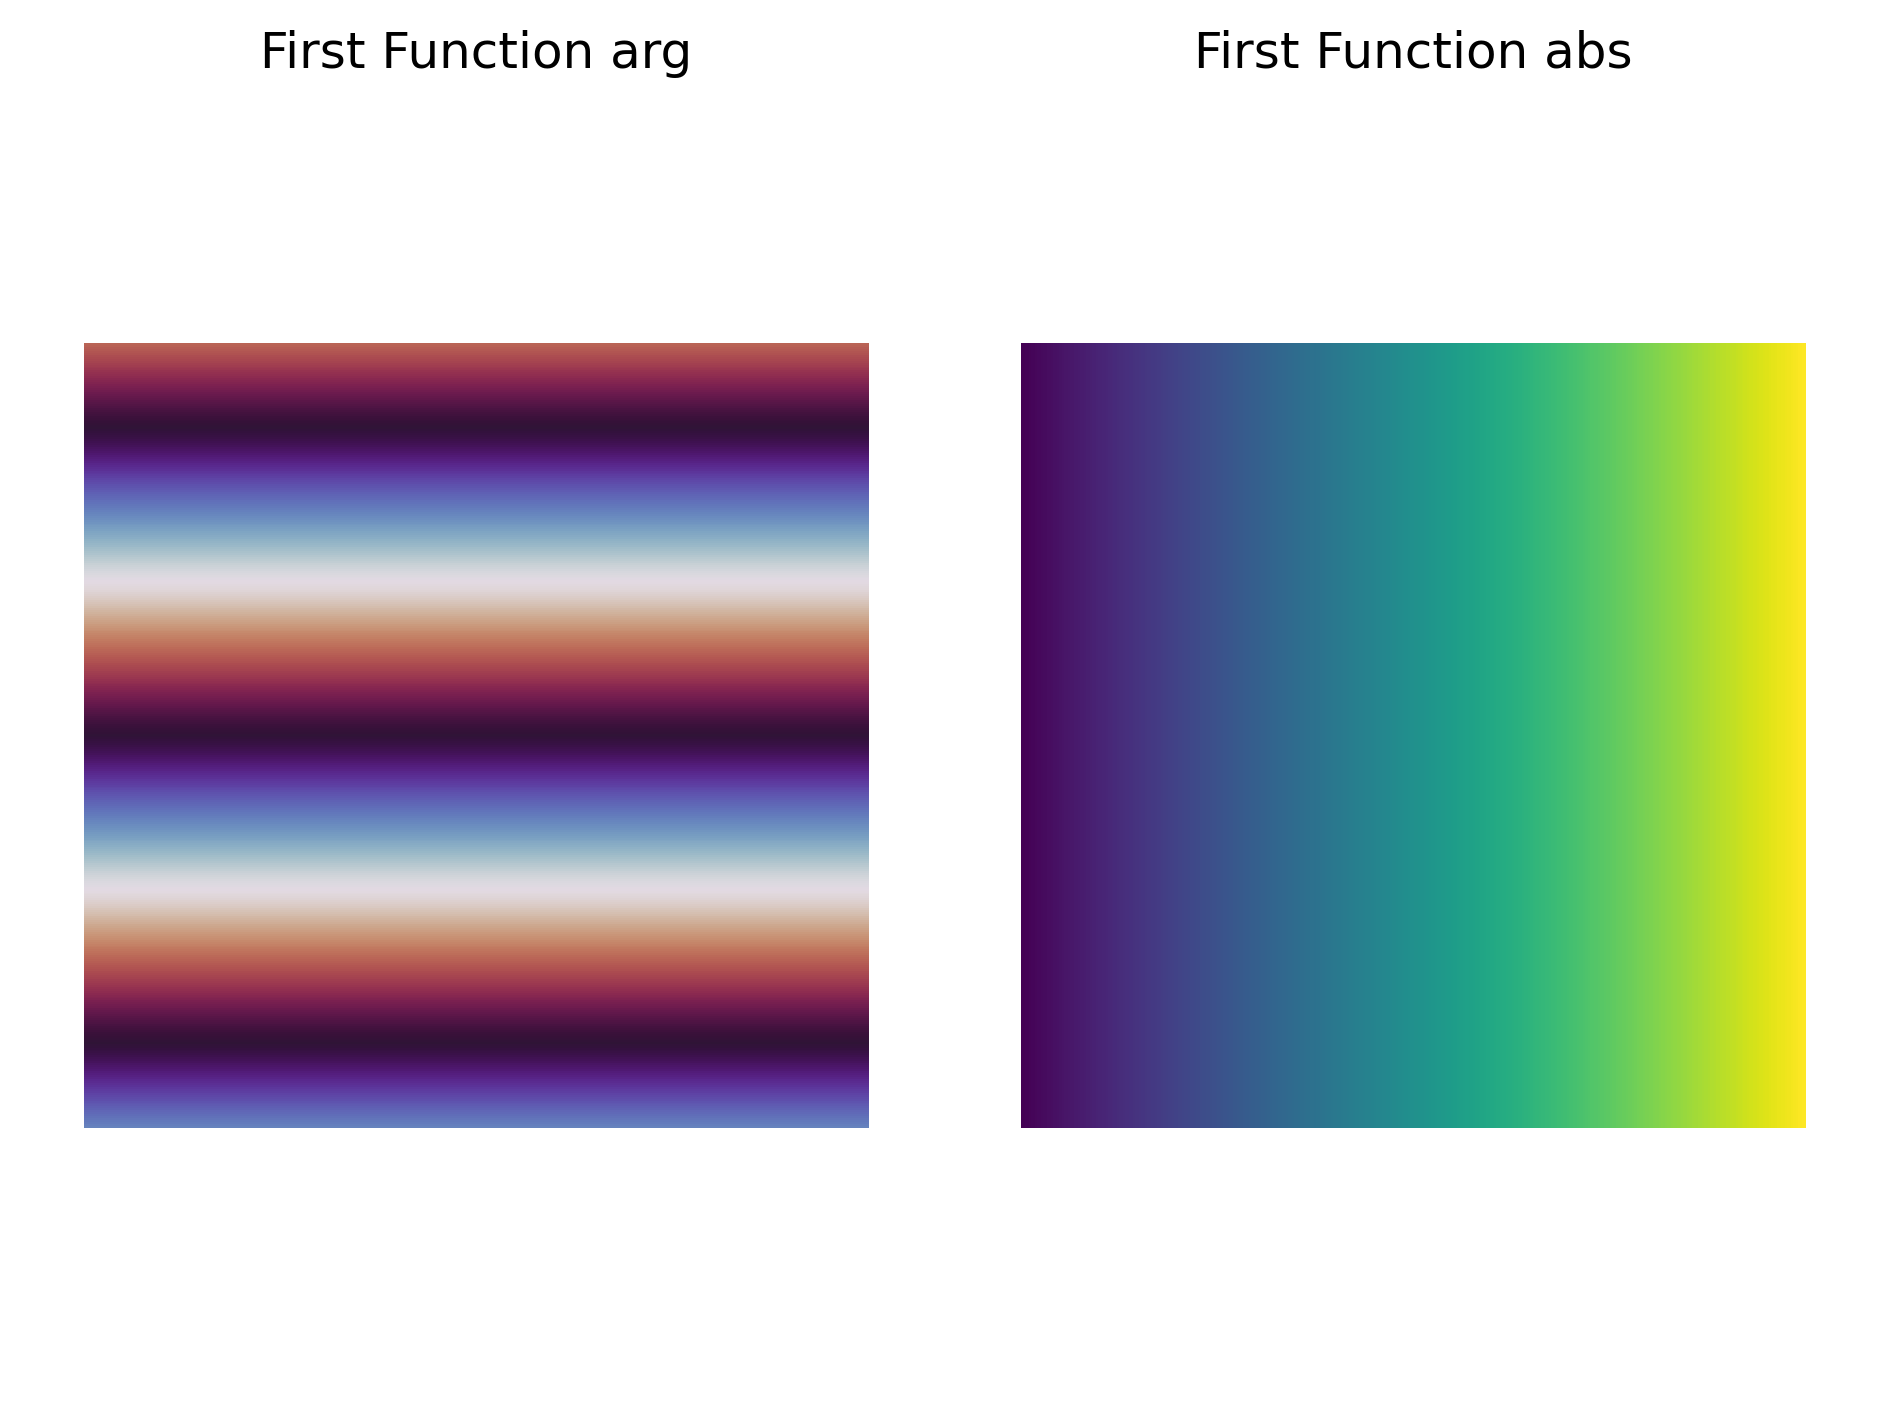

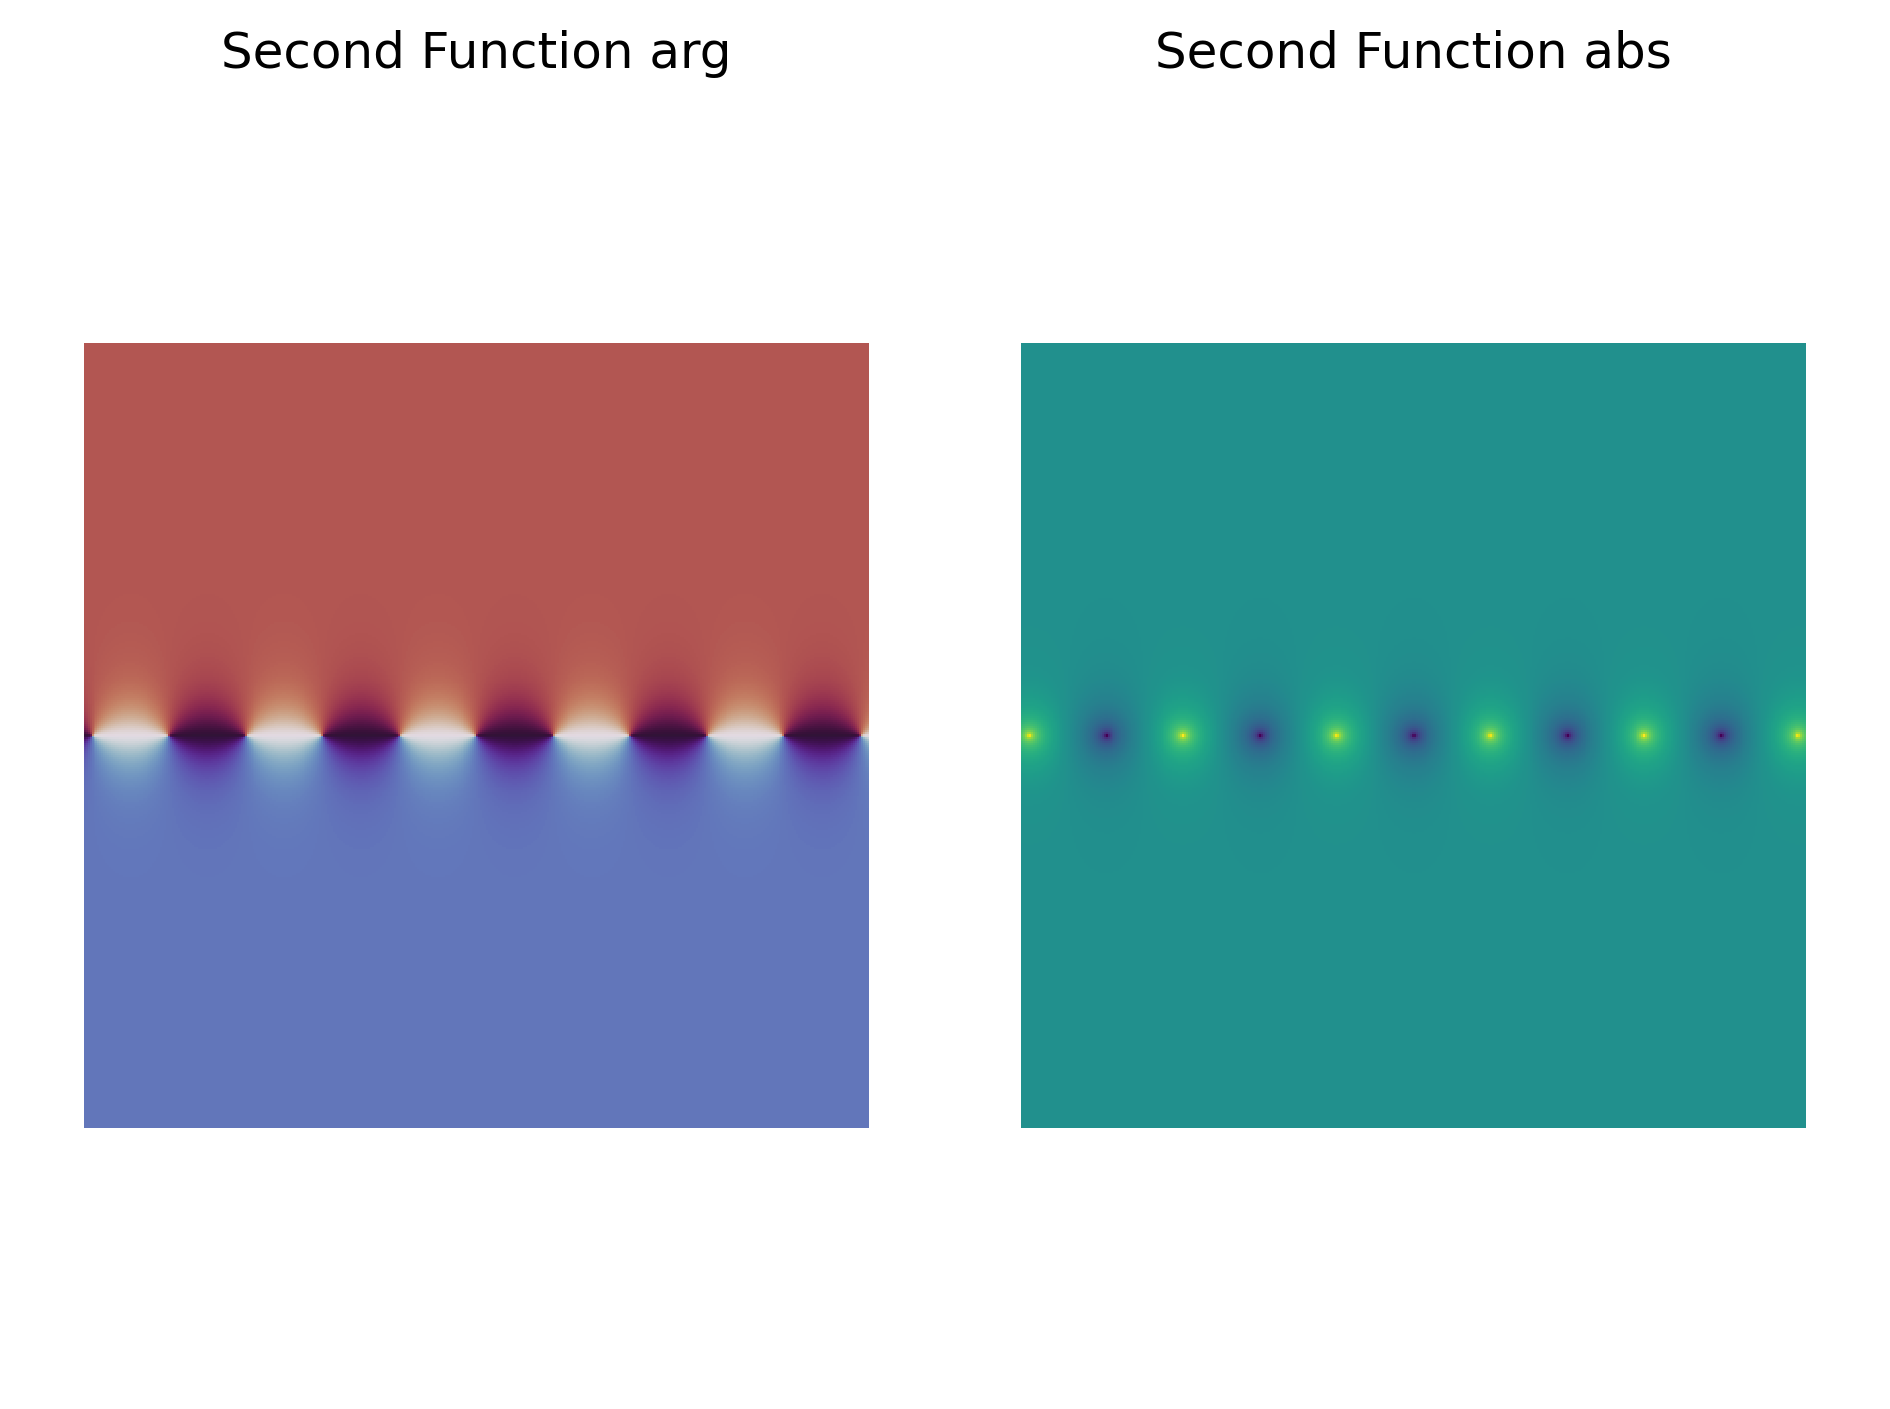

In [12]:
# plot the functions
plt.subplot(121)
plot_complex(f,window=windo1,title="First Function arg")
plt.axis('equal')

plt.subplot(122)
plot_complex(f,window=windo1,title="First Function abs",abs=True)
plt.axis('equal')

plt.tight_layout()
plt.show()

# do the subplots for second equation
plt.subplot(121)
plot_complex(g,window=windo2,title="Second Function arg")
plt.axis('equal')

plt.subplot(122)
plot_complex(g,window=windo2,title="Second Function abs",abs=True)
plt.axis('equal')

plt.tight_layout()
plt.show()

Answers: Firstly they both appear to oscilate. The e^z in complex number is to be expected by euler's formula. It doesn't have any zeros and the magnitude depends only on x values. The tan(z) function is also periodic which is evidenced as we see zeros between the points.

### Problem 6

For each of the following functions, plot the function on the domain $\{x+iy\mid x,y\in[-1,1]\}$ and describe what this view of the plot seems to imply about the function.
Then plot the function on a domain that allows you to see the true nature of the roots and poles and describe how it is different from what the original plot implied.

- $f(z) = 100z^2 + z$
- $f(z) = \sin\left(\frac{1}{100z}\right)$.

(Hint: zoom way in.)

In [13]:
def f(z): return 100*z**2 + z
def g(z): return np.sin(1/(100*z))

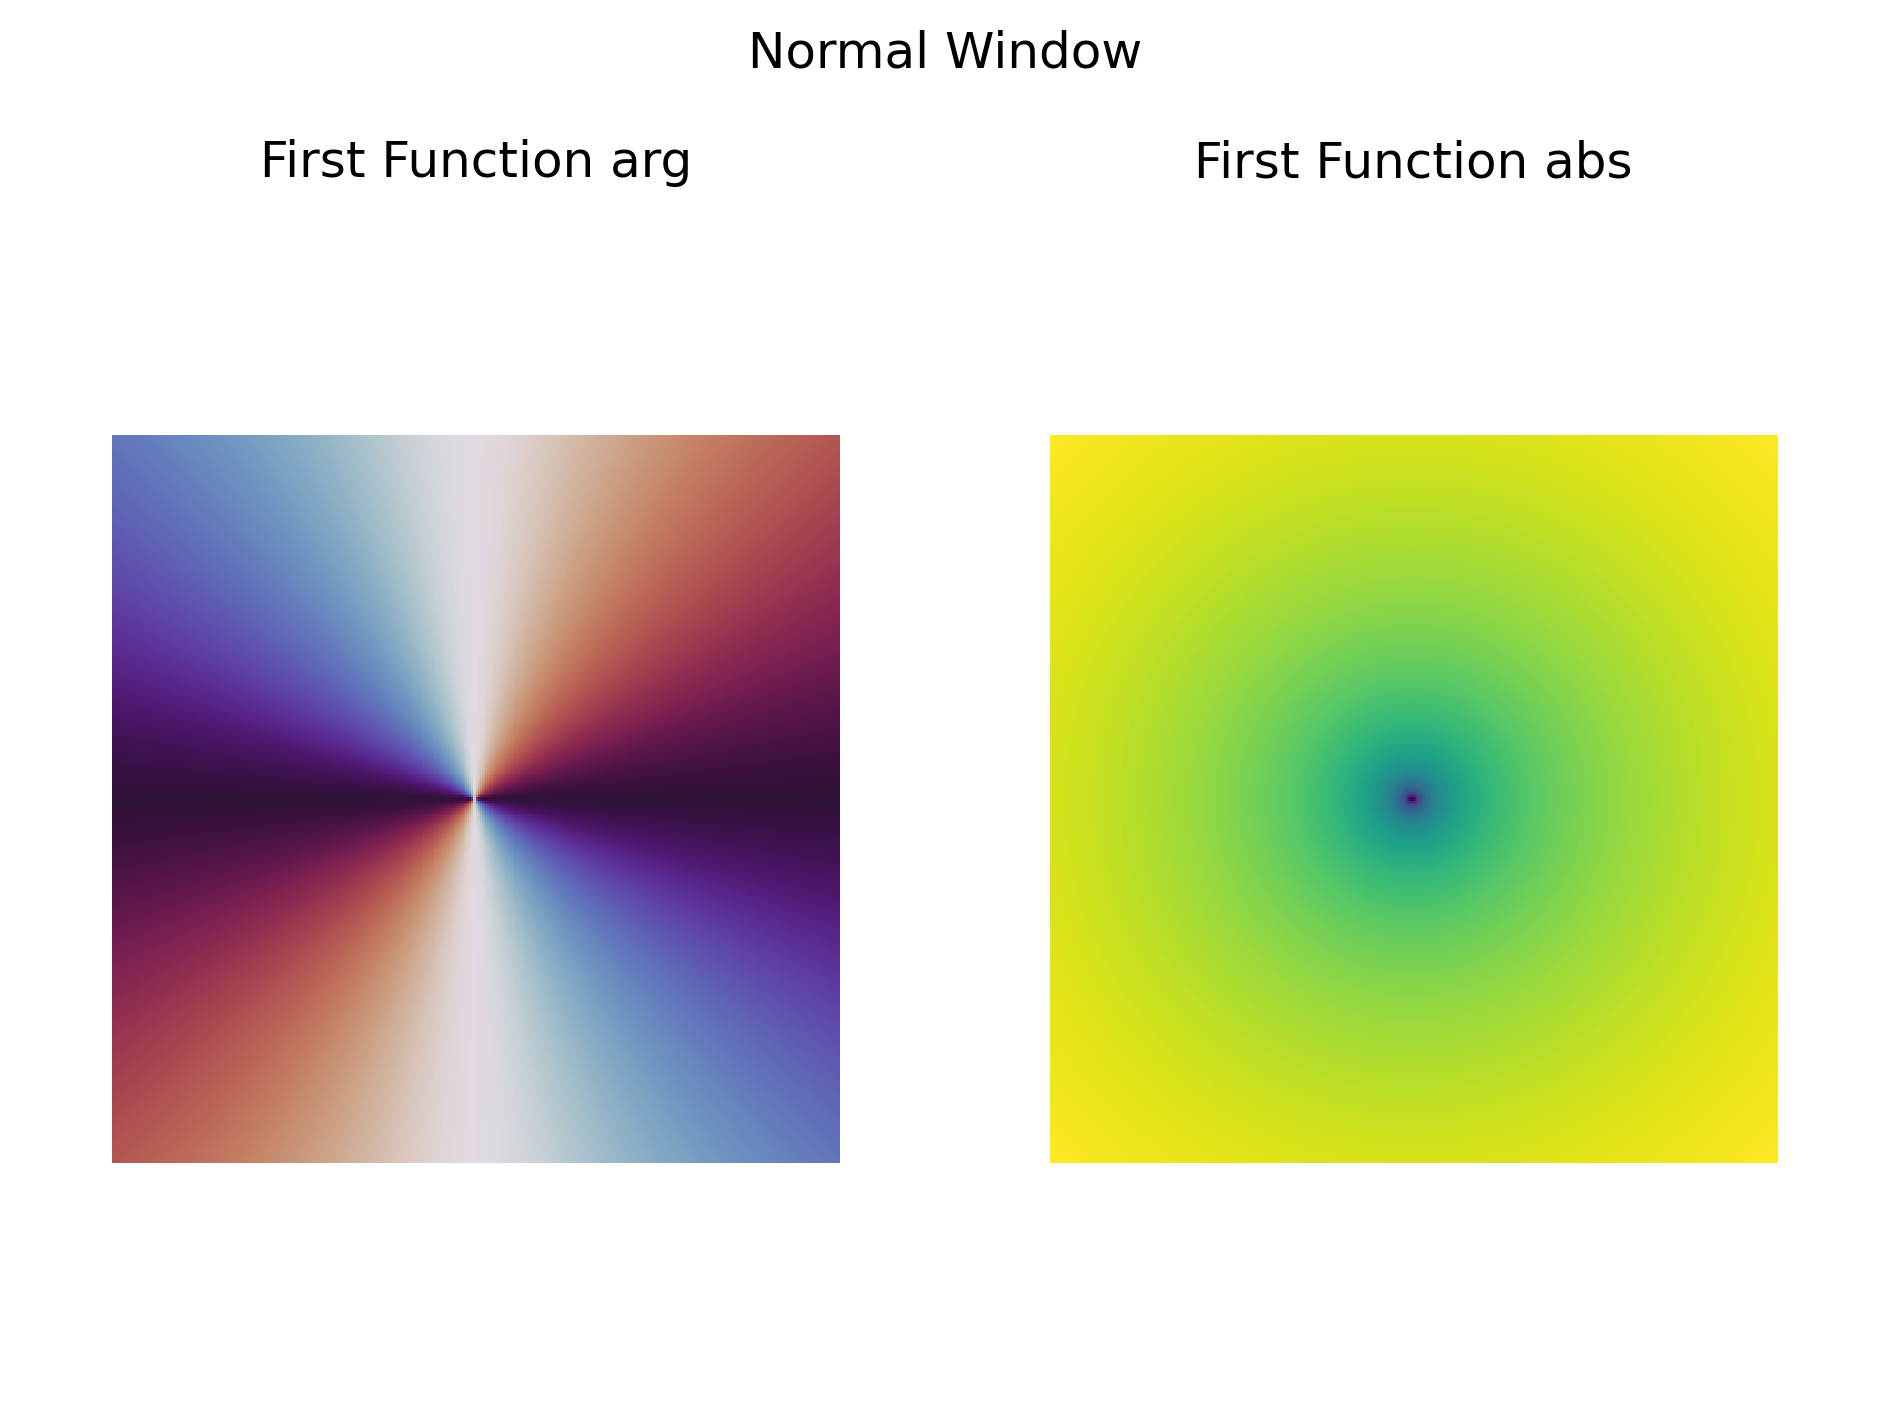

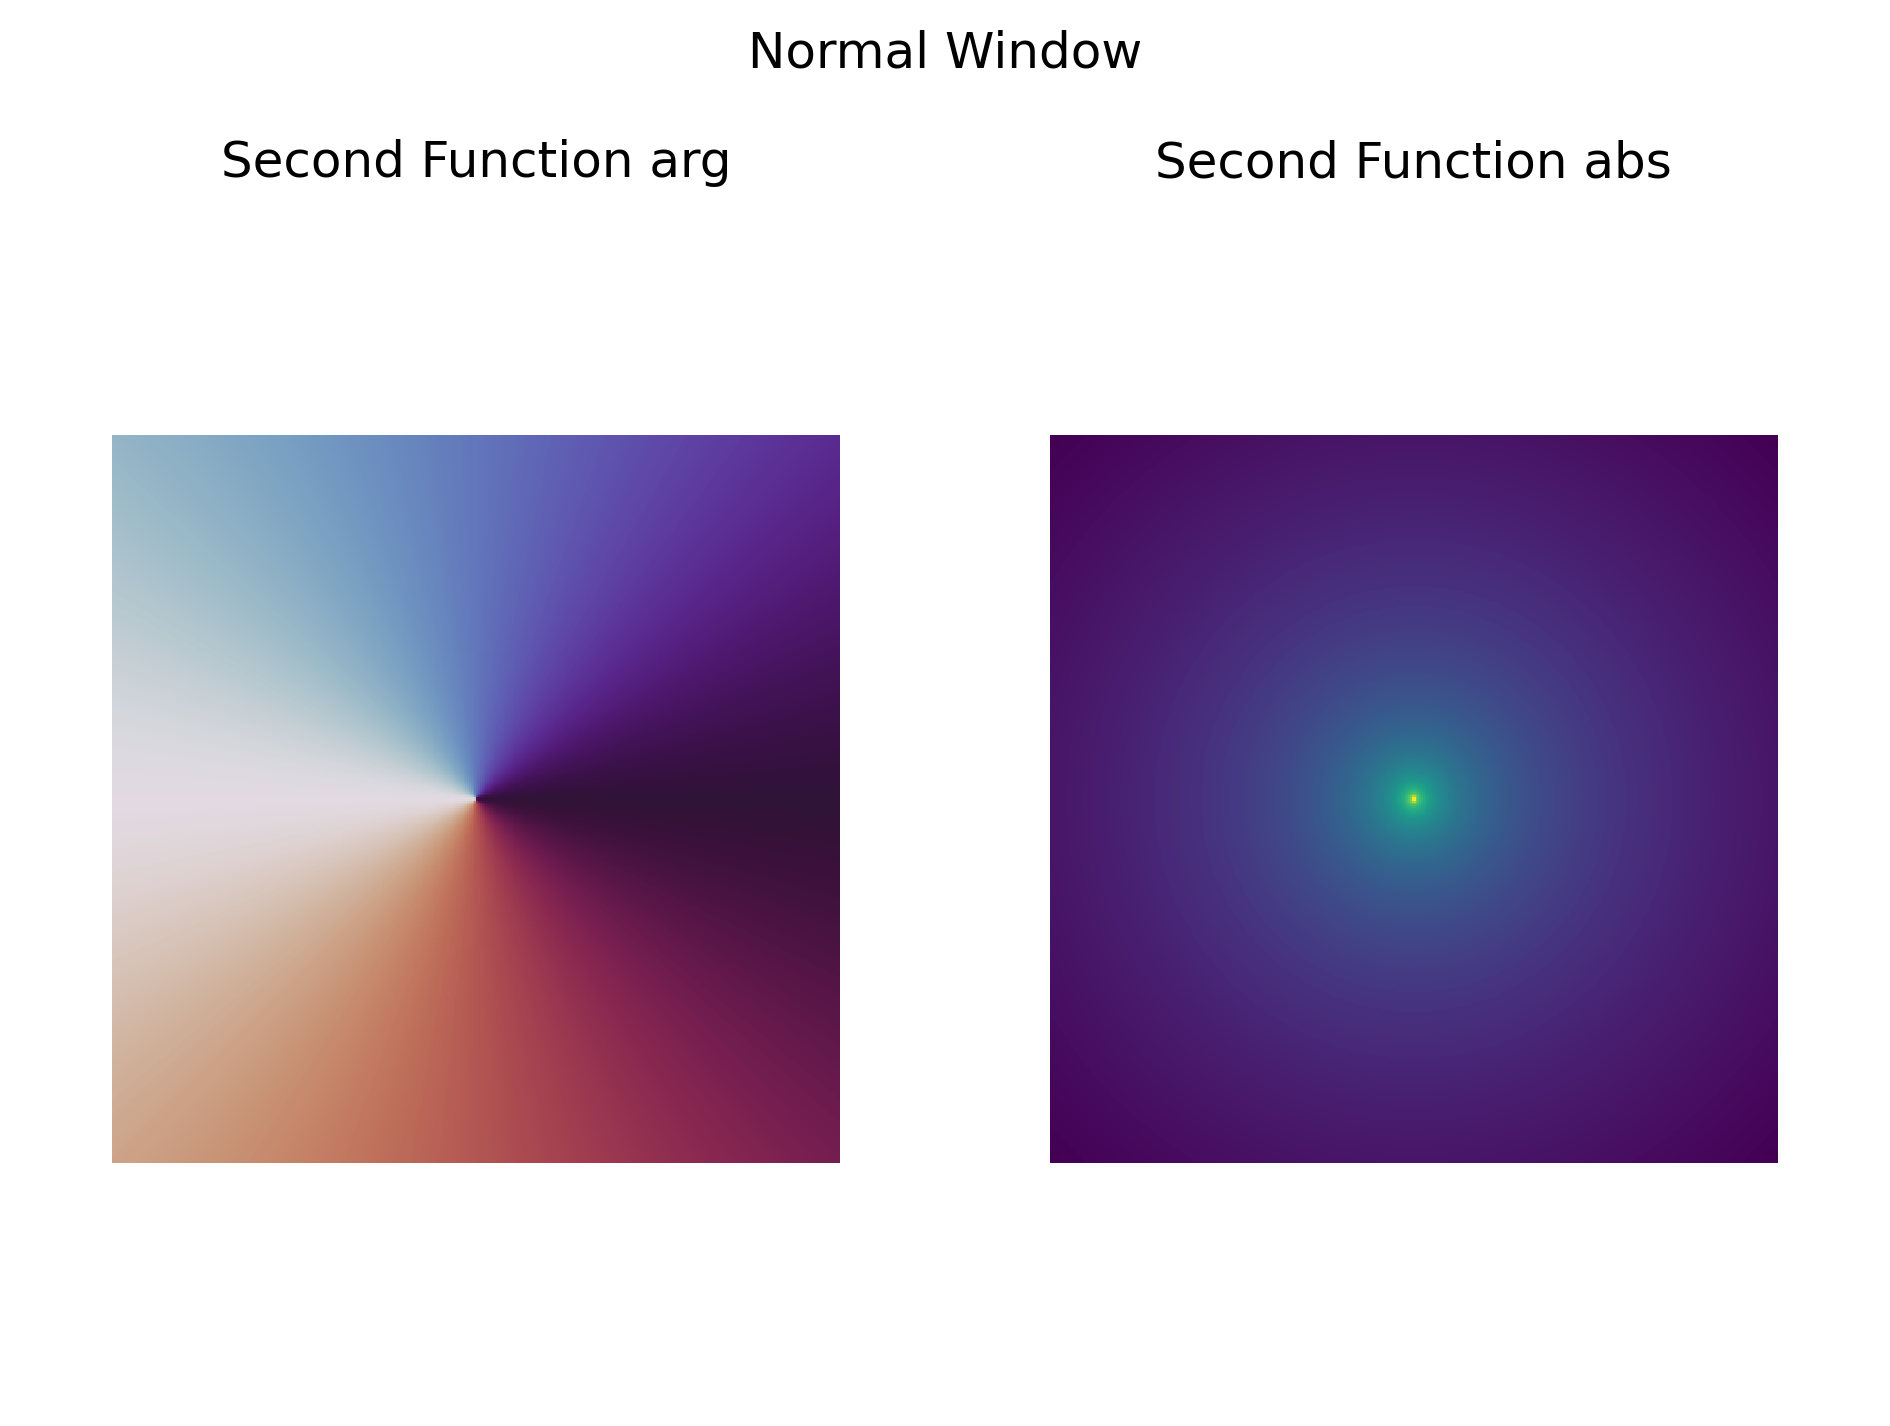

In [14]:
# plot the functions
plt.suptitle("Normal Window")
plt.subplot(121)
plot_complex(f,title="First Function arg")
plt.axis('equal')

plt.subplot(122)
plot_complex(f,title="First Function abs",abs=True)
plt.axis('equal')

plt.tight_layout()
plt.show()


plt.suptitle("Normal Window")
# do the subplots for second equation
plt.subplot(121)
plot_complex(g,title="Second Function arg")
plt.axis('equal')

plt.subplot(122)
plot_complex(g,title="Second Function abs",abs=True)
plt.axis('equal')

plt.tight_layout()
plt.show()

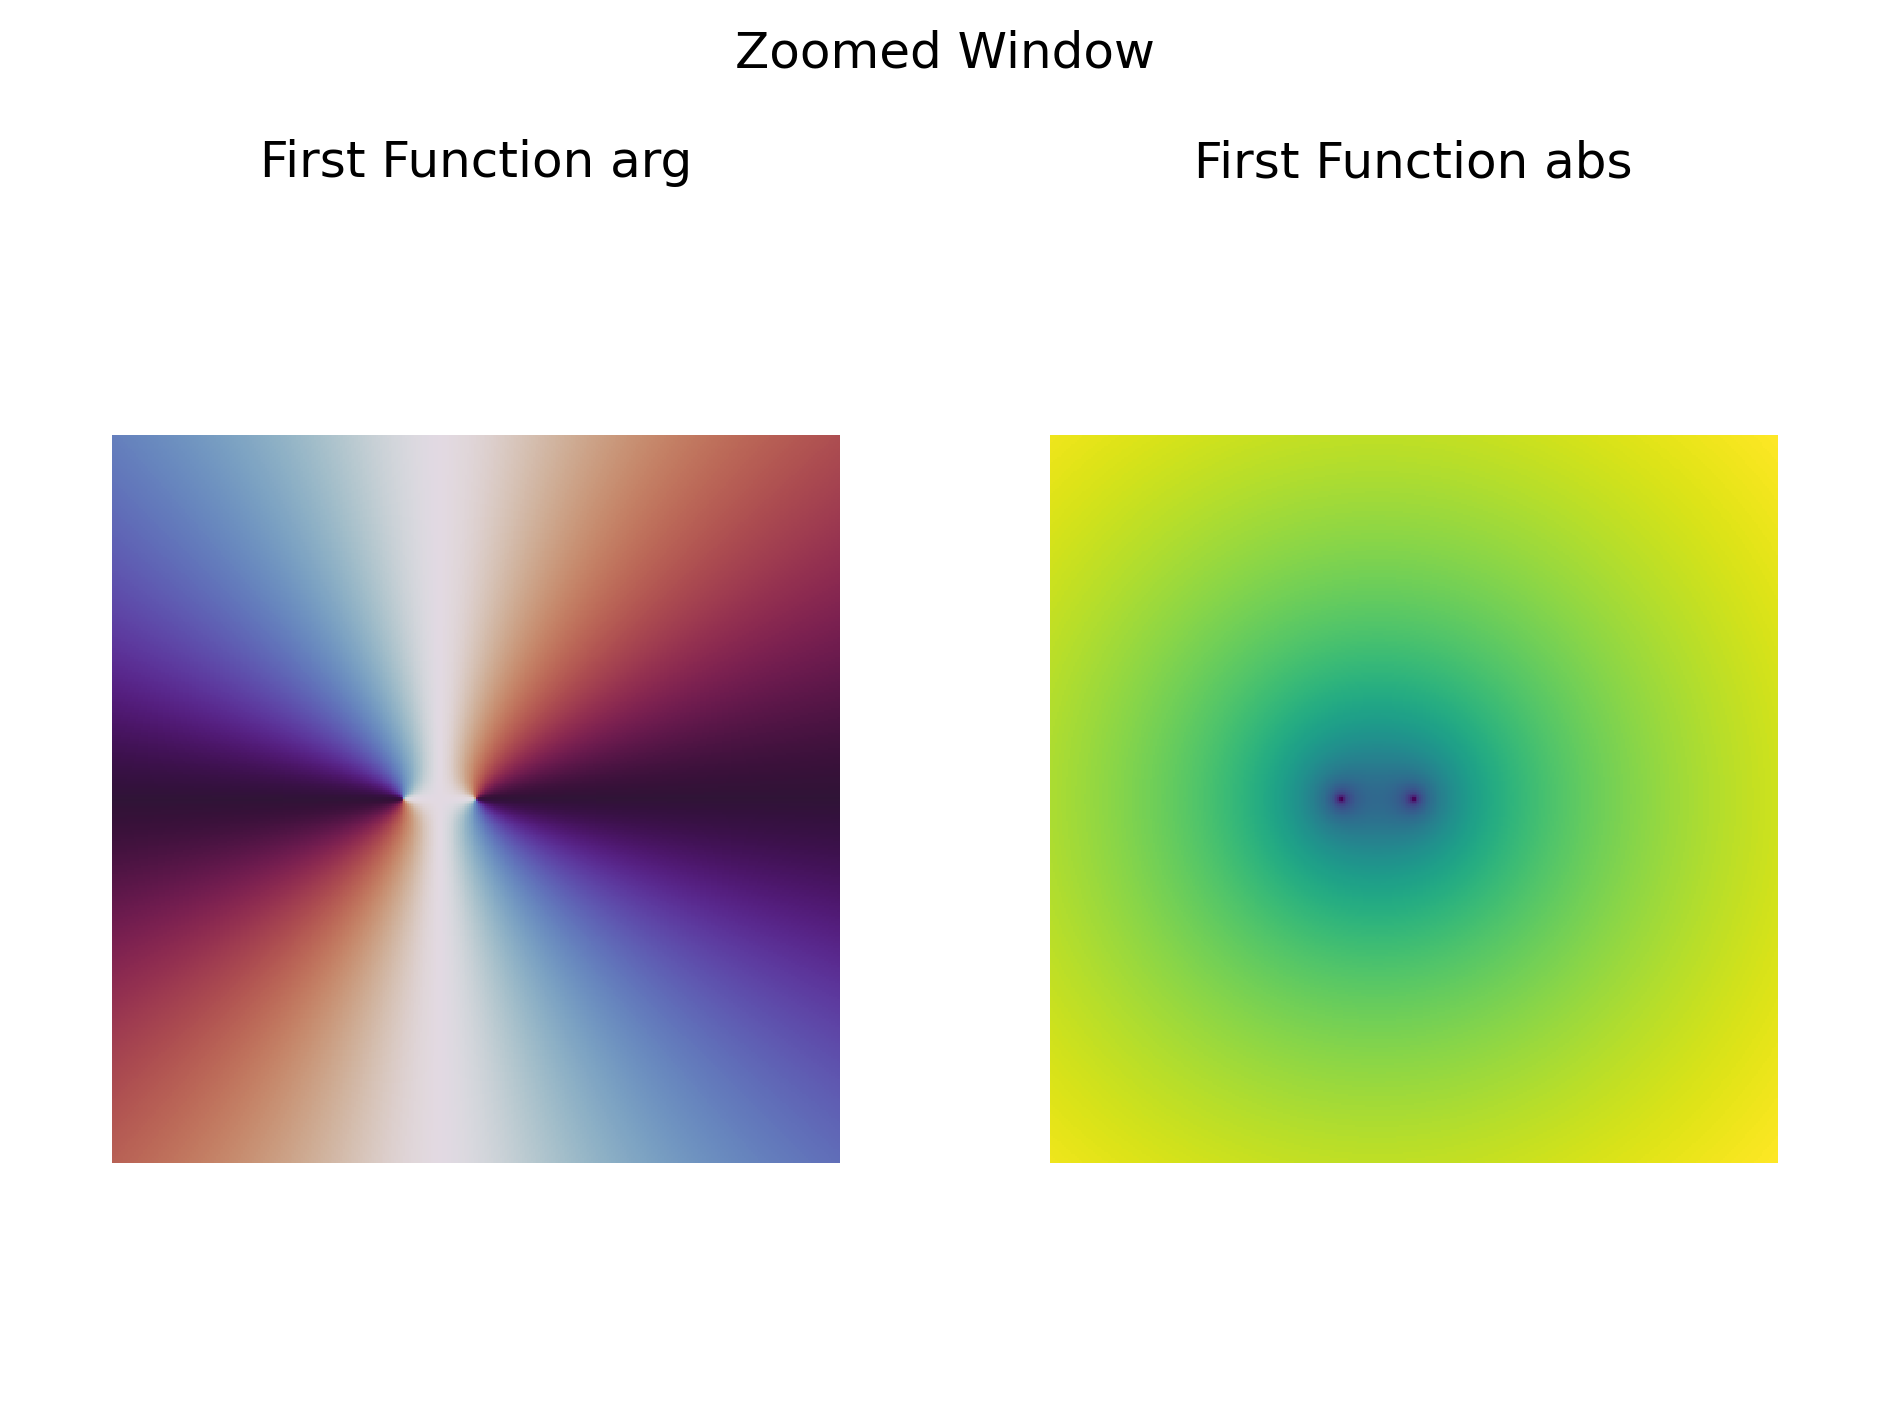

C:\Users\wilso\AppData\Local\Temp\ipykernel_25196\334997729.py:2: RuntimeWarning: overflow encountered in sin
  def g(z): return np.sin(1/(100*z))


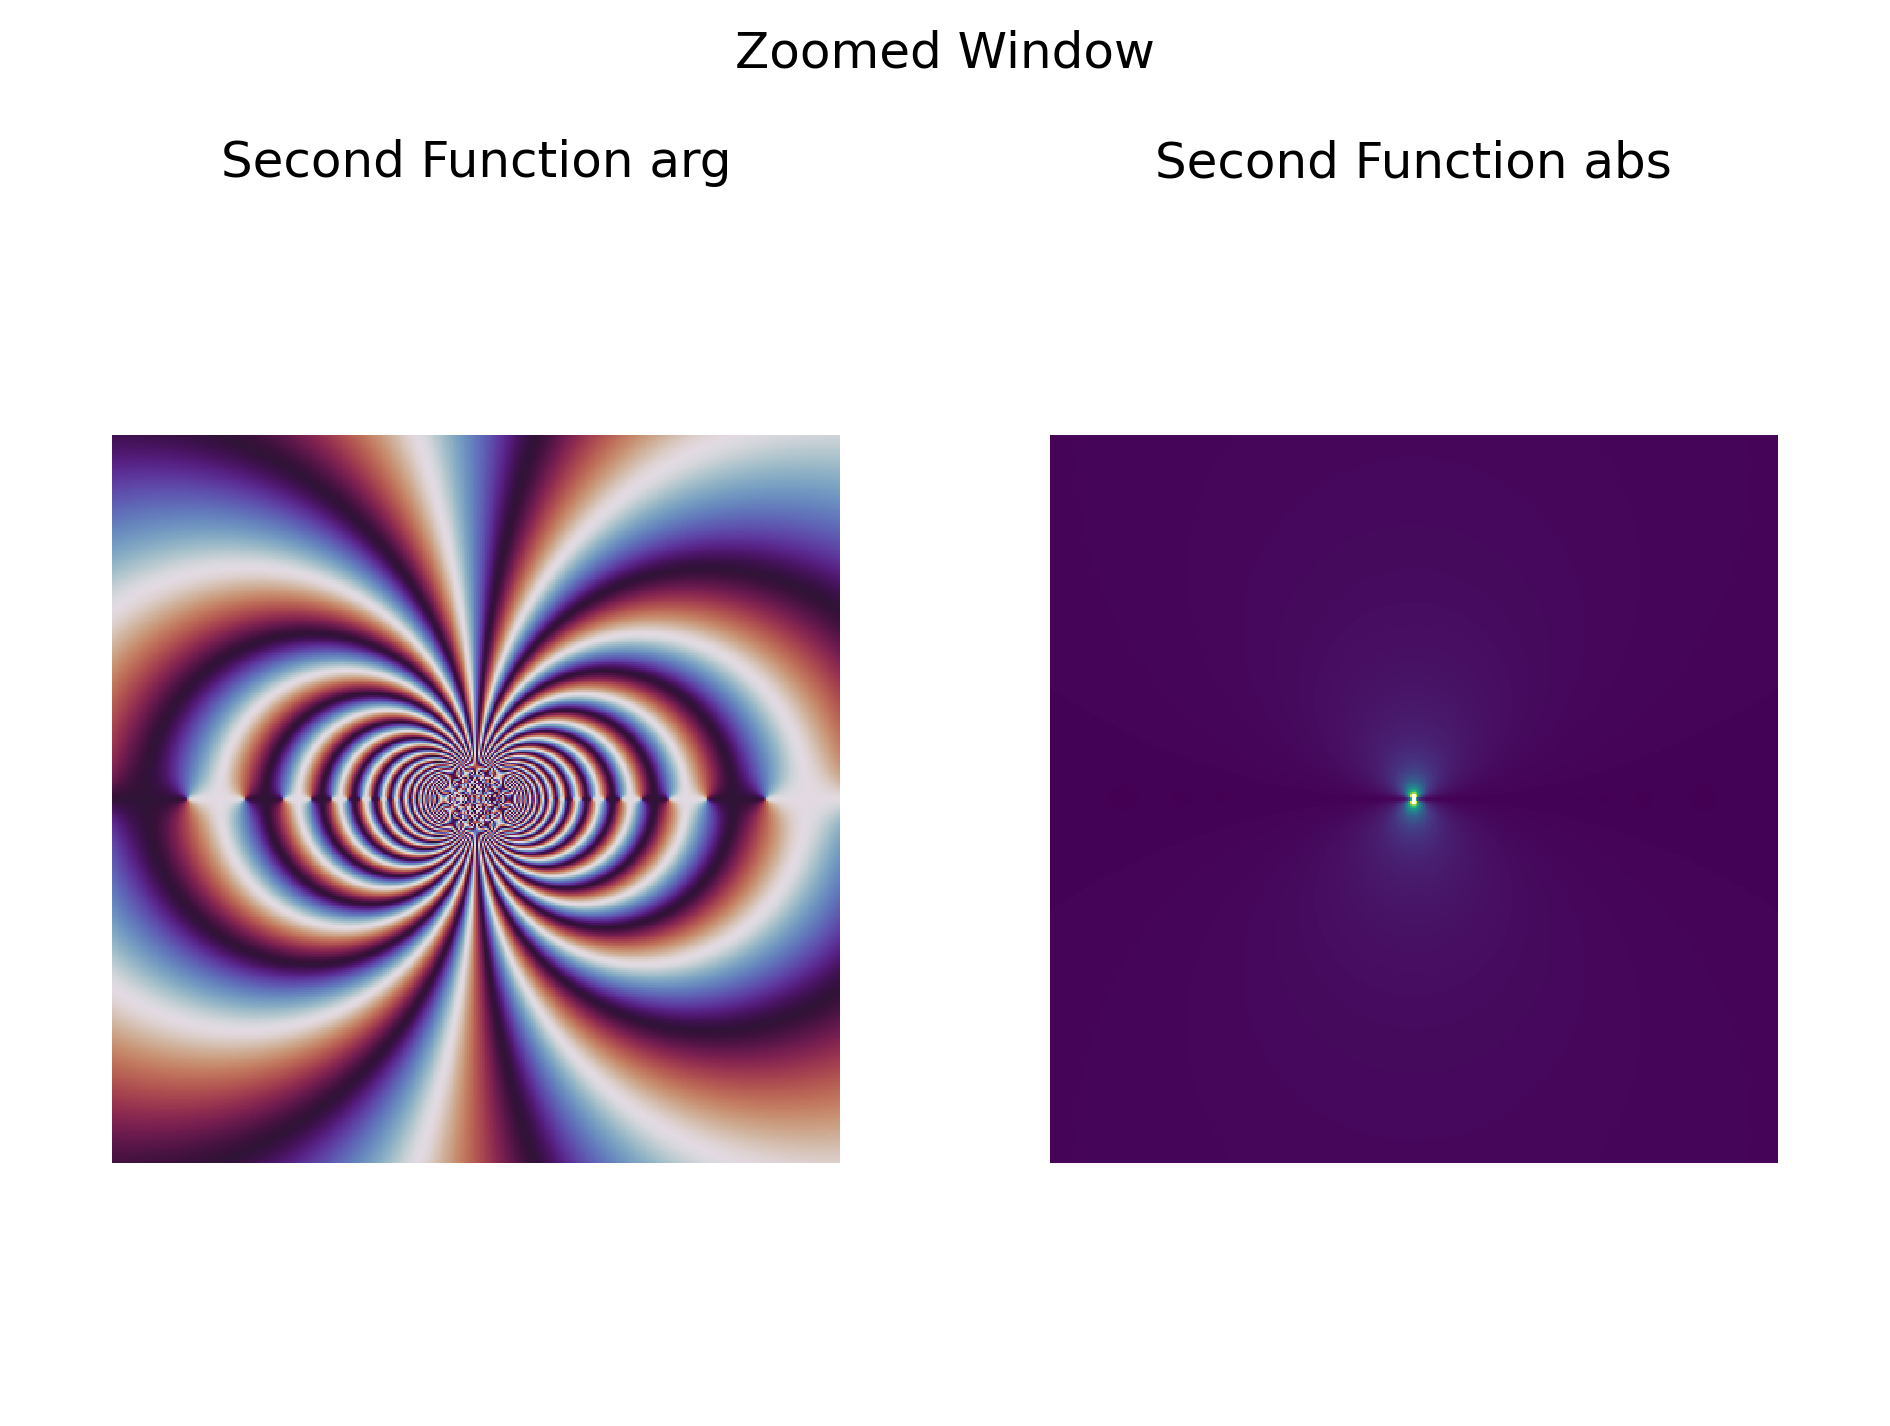

In [15]:
windo1 = [-.05,.05,-.05,.05]
windo0 =[-.001,.001,-.001,.001]
# plot the functions
plt.suptitle("Zoomed Window")
plt.subplot(121)
plot_complex(f,window=windo1,title="First Function arg")
plt.axis('equal')

plt.subplot(122)
plot_complex(f,window=windo1,title="First Function abs",abs=True)
plt.axis('equal')

plt.tight_layout()
plt.show()

plt.suptitle("Zoomed Window")
# do the subplots for second equation
plt.subplot(121)
plot_complex(g,window=windo0,title="Second Function arg")
plt.axis('equal')

plt.subplot(122)
plot_complex(g,window=windo0,title="Second Function abs",abs=True)
plt.axis('equal')

plt.tight_layout()
plt.show()

Answers: It looked like they both just had one root or pole. When zoomed in we see there are 2 very close together ones for the first function. Then for the second function there is accelerating oscillations until it looks almost like a fractal.